In [1]:
import pandas as pd
import numpy as np
import requests
import json

# Cleaning Ridership Data

In [2]:
# Load Ridership data - 2021
for i in range(1, 13):
    if i < 10:
        ridership2021_new = pd.read_csv(r"Bike share ridership 2021-0"+ str(i) +".csv", encoding='cp1252')
    else:
        ridership2021_new = pd.read_csv(r"Bike share ridership 2021-"+ str(i) +".csv", encoding='cp1252')
    
    if i == 1:
        ridership2021 = ridership2021_new
    else:
        ridership2021 = pd.concat([ridership2021, ridership2021_new])
ridership2021

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,ï»¿Trip Id
0,10644218.0,1315,7021,01/01/2021 00:04,Bay St / Albert St,7164.0,01/01/2021 00:26,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,NaN
1,10644220.0,396,7534,01/01/2021 00:07,Walnut Ave / Queen St W,7524.0,01/01/2021 00:13,Lisgar Park,4176.0,Casual Member,NaN
2,10644221.0,86,7162,01/01/2021 00:10,Hayter St / Laplante Ave,7006.0,01/01/2021 00:11,Bay St / College St (East Side),1814.0,Annual Member,NaN
3,10644222.0,741,7003,01/01/2021 00:10,Madison Ave / Bloor St W,7272.0,01/01/2021 00:22,Yonge St / Dundonald St - SMART,198.0,Casual Member,NaN
4,10644223.0,2073,7562,01/01/2021 00:11,Priscilla Ave / Dundas St W - SMART,7562.0,01/01/2021 00:45,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,NaN
...,...,...,...,...,...,...,...,...,...,...,...
145844,NaN,372,7065,12/31/2021 23:56,Dundas St E / Parliament St,7472.0,01/01/2022 00:02,Dundas St E / Victoria St,3487.0,Casual Member,14805103.0
145845,NaN,762,7233,12/31/2021 23:56,King / Cowan Ave - SMART,7569.0,01/01/2022 00:08,Toronto Inukshuk Park,4195.0,Annual Member,14805104.0
145846,NaN,355,7065,12/31/2021 23:56,Dundas St E / Parliament St,7472.0,01/01/2022 00:02,Dundas St E / Victoria St,4574.0,Casual Member,14805105.0
145847,NaN,770,7292,12/31/2021 23:56,Granby St / Church St - SMART,7076.0,01/01/2022 00:09,York St / Queens Quay W,5879.0,Annual Member,14805107.0


In [3]:
# Info() to check for column datatypes 
ridership2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575182 entries, 0 to 145848
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Trip Id             float64
 1   Trip  Duration      int64  
 2   Start Station Id    int64  
 3   Start Time          object 
 4   Start Station Name  object 
 5   End Station Id      float64
 6   End Time            object 
 7   End Station Name    object 
 8   Bike Id             float64
 9   User Type           object 
 10  ï»¿Trip Id          float64
dtypes: float64(4), int64(2), object(5)
memory usage: 327.3+ MB


In [4]:
# Fixing the column names by removing special characters
ridership2021['Trip Id'].fillna(ridership2021['ï»¿Trip Id'],inplace = True)

ridership2021.drop(columns='ï»¿Trip Id',axis = 1, inplace=True)

In [8]:
# Load Ridership data - 2022
for i in range(1, 7):
    ridership2022_new = pd.read_csv(r"Bike share ridership 2022-0"+ str(i) +".csv", encoding='cp1252')
    
    if i == 1:
        ridership2022 = ridership2022_new
    else:
        ridership2022 = pd.concat([ridership2022, ridership2022_new])

In [9]:
# Fixing the column names by removing special characters
ridership2022.rename(columns={'ï»¿Trip Id':'Trip Id'},inplace= True)
ridership2022

In [11]:
# Load Ridership data - 2020
for i in range(1, 13):
    if i < 10:
        ridership2020_new = pd.read_csv(r"2020-0"+ str(i) +".csv", encoding='cp1252')
    else:
        ridership2020_new = pd.read_csv(r"2020-"+ str(i) +".csv", encoding='cp1252')
    
    if i == 1:
        ridership2020 = ridership2020_new
    else:
        ridership2020 = pd.concat([ridership2020, ridership2020_new])

,ï»¿Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104,Annual Member
1,7334129,419,7007,01/01/2020 00:10,College St / Huron St,7163,01/01/2020 00:17,Yonge St / Wood St,2126,Annual Member
2,7334130,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108,01/01/2020 00:22,Front St E / Cherry St,4425,Annual Member
3,7334131,1274,7333,01/01/2020 00:17,King St E / Victoria St,7311,01/01/2020 00:38,Sherbourne St / Isabella St,4233,Annual Member
4,7334132,906,7009,01/01/2020 00:19,King St E / Jarvis St,7004,01/01/2020 00:34,University Ave / Elm St,2341,Casual Member
...,...,...,...,...,...,...,...,...,...,...
95343,10644213,330,7010,12/31/2020 23:52,King St W / Spadina Ave,7216,12/31/2020 23:57,Wellington St W / Stafford St,3458,Annual Member
95344,10644214,216,7288,12/31/2020 23:54,Humber Bay Shores Park West,7514,12/31/2020 23:58,Humber Bay Shores Park / Marine Parade Dr,4085,Annual Member
95345,10644215,204,7288,12/31/2020 23:54,Humber Bay Shores Park West,7514,12/31/2020 23:58,Humber Bay Shores Park / Marine Parade Dr,3580,Annual Member
95346,10644216,1659,7270,12/31/2020 23:56,Church St / Dundas St E - SMART,7270,01/01/2021 00:24,Church St / Dundas St E - SMART,5137,Annual Member


In [12]:
# Fixing the column names by removing special characters
ridership2020.rename(columns={'ï»¿Trip Id':'Trip Id'},inplace= True)
ridership2020

In [14]:
# Load Ridership data - 2019
for i in range(1, 5):
    ridership2019_new = pd.read_csv(r"2019-Q"+ str(i) +".csv", encoding='cp1252')
    
    if i == 1:
        ridership2019 = ridership2019_new
    else:
        ridership2019 = pd.concat([ridership2019, ridership2019_new])
ridership2019

,ï»¿Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,1547.0,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,1112.0,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,589.0,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member
3,4581281,259.0,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,281.0,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member
...,...,...,...,...,...,...,...,...,...,...
468411,7334123,523.0,7098,12/31/2019 23:39,Riverdale Park South (Broadview Ave),7339.0,12/31/2019 23:48,Carlaw Ave / Strathcona Ave,861,Annual Member
468412,7334124,273.0,7044,12/31/2019 23:45,Church St / Alexander St,7273.0,12/31/2019 23:49,Bay St / Charles St - SMART,3776,Annual Member
468413,7334125,1055.0,7100,12/31/2019 23:51,Dundas St E / Regent Park Blvd,7100.0,01/01/2020 00:08,Dundas St E / Regent Park Blvd,2382,Annual Member
468414,7334126,459.0,7470,12/31/2019 23:55,York St / Lake Shore Blvd W,7102.0,01/01/2020 00:03,Nelson St / Duncan St,2800,Annual Member


In [15]:
# Fixing the column names by removing special characters
ridership2019.rename(columns={'ï»¿Trip Id':'Trip Id'},inplace= True)
ridership2019

In [17]:
# Load Ridership data - 2018
for i in range(1, 5):
    ridership2018_new = pd.read_csv(r"Bike Share Toronto Ridership_Q"+ str(i) +" 2018.csv", encoding='cp1252')
    
    if i == 1:
        ridership2018 = ridership2018_new
    else:
        ridership2018 = pd.concat([ridership2018, ridership2018_new])
ridership2018

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member
...,...,...,...,...,...,...,...,...,...
363485,4581273,379,7088,12/31/2018 23:43,Danforth Ave / Coxwell Ave,12/31/2018 23:49,7091,Donlands Station,Annual Member
363486,4581274,306,7030,12/31/2018 23:45,Bay St / Wellesley St W,12/31/2018 23:50,7031,Jarvis St / Isabella St,Annual Member
363487,4581275,340,7020,12/31/2018 23:49,Phoebe St / Spadina Ave,12/31/2018 23:55,7000,Fort York Blvd / Capreol Ct,Annual Member
363488,4581276,1466,7014,12/31/2018 23:52,Sherbourne St / Carlton St (Allan Gardens),1/1/2019 0:17,7269,Toronto Eaton Centre (Yonge St),Annual Member


In [18]:
# Load Ridership data - 2017
for i in range(1, 5):
    ridership2017_new = pd.read_csv(r"Bikeshare Ridership (2017 Q"+ str(i) +").csv", encoding='cp1252')
    
    if i == 1:
        ridership2017 = ridership2017_new
    else:
        ridership2017 = pd.concat([ridership2017, ridership2017_new])
ridership2017

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member
...,...,...,...,...,...,...,...,...,...
363400,2383642,12/31/17 23:46:27,12/31/17 23:46:53,26,NaN,Bloor St / Brunswick Ave,NaN,Bloor St / Brunswick Ave,Casual
363401,2383643,12/31/17 23:47:13,1/01/18 00:11:40,1467,NaN,Bloor St / Brunswick Ave,NaN,HTO Park (Queens Quay W),Casual
363402,2383644,12/31/17 23:47:40,12/31/17 23:57:49,609,NaN,Kendal Ave / Spadina Rd,NaN,Augusta Ave / Denison Sq,Member
363403,2383645,12/31/17 23:49:08,12/31/17 23:49:34,26,NaN,Phoebe St / Spadina Ave,NaN,Phoebe St / Spadina Ave,Member


# 
Make each dataset's columns consistent

In [19]:
# Check if the column names are consistent in the files loaded for all the files
print(ridership2022.columns)

print(ridership2021.columns)

print(ridership2020.columns)

print(ridership2019.columns)

print(ridership2018.columns)

print(ridership2017.columns)

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')

In [25]:
# Making the column names consistent for all the ridership years
ridership2018.set_axis(['Trip Id','Trip  Duration', 'Start Station Id','Start Time','Start Station Name','End Time',
        'End Station Id', 'End Station Name',
        'User Type'], axis = 1,inplace=True)


ridership2017.set_axis(['Trip Id', 'Start Time','End Time', 'Trip  Duration', 'Start Station Id',
       'Start Station Name', 'End Station Id', 'End Station Name',
        'User Type'], axis = 1,inplace=True)


In [ ]:
# Combine all ridership datasets
ridership = pd.concat([ridership2017,ridership2018,ridership2019,ridership2020,ridership2021,ridership2022])

In [30]:
#Check for null values
ridership2018[pd.isnull(ridership2018['User Type'])]

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Time,End Station Id,End Station Name,User Type


#
Ridership - Fixing null values

In [ ]:
# Drop most of the missing value rows since it does not have significant percentage of total data

ridership.dropna(subset=['User Type'],inplace=True)

ridership.dropna(subset=['Trip Duration'], inplace = True)

# Only deleting the station id and names for which both the values are not available

ridership.dropna(subset=['End Station Id','End Station Name'],how = 'all', inplace = True)

ridership.dropna(subset=['Start Station Id','Start Station Name'],how = 'all', inplace = True)


In [118]:
# Fixing the space in the column name
ridership.rename(columns={'Trip  Duration':'Trip Duration'},inplace=True)

In [127]:
# drop rows with 0 trip duration because they are not actually riding the bikes
ridership[ridership['Trip Duration'] == 0]

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Bike Id
600,4581883.0,01/01/2019 15:26,01/01/2019 15:26,0.0,7118,King St W / Bay St (East Side),7118,King St W / Bay St (East Side),Annual Member,2417
10860,4594097.0,01/05/2019 20:19,01/05/2019 20:26,0.0,7059,Front St W / Blue Jays Way,7118,King St W / Bay St (East Side),Annual Member,2460
77118,4890392.0,04/17/2019 09:07,04/17/2019 09:07,0.0,7028,Gould St / Mutual St,7326,Davenport Rd / Lansdowne Ave.,Annual Member,2787
77942,4891462.0,04/17/2019 12:02,04/17/2019 12:04,0.0,7118,King St W / Bay St (East Side),7284,University Ave / King St W - SMART,Annual Member,1708
127594,4947079.0,04/27/2019 14:59,04/27/2019 14:59,0.0,7113,Parliament St / Aberdeen Ave,7113,Parliament St / Aberdeen Ave,Annual Member,1709
...,...,...,...,...,...,...,...,...,...,...
588365,16715074.0,06/30/2022 11:18,06/30/2022 11:18,0.0,7211,Fort York Blvd / Garrison Rd,7016,Bay St / Queens Quay W (Ferry Terminal),Casual Member,2686
589050,16715882.0,06/30/2022 12:04,06/30/2022 12:04,0.0,7175,HTO Park (Queens Quay W),7203,Bathurst St/Queens Quay(Billy Bishop Airport),Casual Member,57
592312,16719617.0,06/30/2022 14:57,06/30/2022 14:57,0.0,7127,Bay St / Scollard St,7046,Niagara St / Richmond St W,Casual Member,4967
594790,16722359.0,06/30/2022 16:39,06/30/2022 16:39,0.0,7226,Lake Shore Blvd W / The Boulevard Club,7288,Humber Bay Shores Park West,Casual Member,4740


In [128]:
#Reset index
ridership = ridership.drop(ridership[ridership['Trip Duration'] == 0].index)

In [2]:
# To fill the missing station ID and names, we extract station information from Toronto open data
r = requests.get("https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information")

In [3]:
# Extracting only the required columns - station id and names
r.json()['data']['stations']
stations  = r.json()['data']['stations']

station_id = []
station_name =[]
lats = []
lons = []
capacity = []

for i in stations:
    station_id.append(i['station_id'])
    station_name.append(i['name'])
    lats.append(i['lat'])
    lons.append(i['lon'])
    capacity.append(i['capacity'])
    

[{'station_id': '7000',
  'name': 'Fort York  Blvd / Capreol Ct',
  'physical_configuration': 'REGULAR',
  'lat': 43.639832,
  'lon': -79.395954,
  'altitude': 0.0,
  'address': 'Fort York  Blvd / Capreol Ct',
  'capacity': 35,
  'is_charging_station': False,
  'rental_methods': ['KEY', 'TRANSITCARD', 'CREDITCARD', 'PHONE'],
  'groups': [],
  'obcn': '647-643-9607',
  'nearby_distance': 500.0,
  '_ride_code_support': True},
 {'station_id': '7001',
  'name': 'Wellesley Station Green P',
  'physical_configuration': 'ELECTRICBIKESTATION',
  'lat': 43.66496415990742,
  'lon': -79.38355031526893,
  'altitude': 0.0,
  'address': 'Yonge / Wellesley',
  'post_code': 'M4Y 1G7',
  'capacity': 26,
  'is_charging_station': True,
  'rental_methods': ['KEY', 'TRANSITCARD', 'CREDITCARD', 'PHONE'],
  'groups': [],
  'obcn': '416-617-9576',
  'nearby_distance': 500.0,
  '_ride_code_support': True},
 {'station_id': '7002',
  'name': 'St. George St / Bloor St W',
  'physical_configuration': 'REGULAR',
  

In [8]:
# Creat Dataframe
station_info = pd.DataFrame({"station_id":station_id,"station_name":station_name,"lat":lats,"lon":lons,"capacity":capacity})

station_info

In [10]:
# station_info.to_csv('station_info.csv') --- remove it later

In [210]:
station_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    628 non-null    int64  
 1   station_name  628 non-null    object 
 2   lat           628 non-null    float64
 3   lon           628 non-null    float64
 4   capacity      628 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 24.7+ KB


# 
Join station information to the ridership data to fill the station's null value in ridership dataset

In [213]:
ridership = pd.merge(ridership,station_info, left_on='Start Station Name', right_on='station_name', how = 'left')

In [214]:
ridership['Start Station Id'].fillna(ridership['station_id'],inplace = True)

In [215]:
ridership.drop(columns=['station_id', 'station_name', 'lat', 'lon', 'capacity'],axis = 1, inplace=True)

In [216]:
ridership = pd.merge(ridership,station_info, left_on='End Station Name', right_on='station_name', how = 'left')

In [217]:
ridership['End Station Id'].fillna(ridership['station_id'],inplace = True)

In [218]:
ridership.drop(columns=['station_id', 'station_name', 'lat', 'lon', 'capacity'],axis = 1, inplace=True)

In [219]:
ridership = pd.merge(ridership,station_info, left_on='Start Station Id', right_on='station_id', how = 'left')

In [220]:
ridership['Start Station Name'].fillna(ridership['station_name'],inplace = True)

In [221]:
ridership.drop(columns=['station_id', 'station_name', 'lat', 'lon', 'capacity'],axis = 1, inplace=True)

In [222]:
ridership = pd.merge(ridership,station_info, left_on='End Station Id', right_on='station_id', how = 'left')

In [223]:
ridership['End Station Name'].fillna(ridership['station_name'],inplace = True)

In [224]:
ridership.drop(columns=['station_id', 'station_name', 'lat', 'lon', 'capacity'],axis = 1, inplace=True)

In [230]:
ridership[pd.isnull(ridership['Start Station Id']) == True]

,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Bike Id
458388,1253915.0,7/1/2017 0:01,7/1/2017 0:15,837.0,NaN,Fort York Blvd / Capreol Crt,7175,HTO Park (Queens Quay W),Casual,NaN
458389,1253916.0,7/1/2017 0:01,7/1/2017 0:14,786.0,NaN,Fort York Blvd / Capreol Crt,7175,HTO Park (Queens Quay W),Casual,NaN
458401,1253928.0,7/1/2017 0:09,7/1/2017 0:14,306.0,NaN,Michael Sweet Ave / St. Patrick St,7038,Dundas St W / Yonge St,Member,NaN
458403,1253930.0,7/1/2017 0:09,7/1/2017 0:15,331.0,NaN,University Ave / King St W,7050,Richmond St E / Jarvis St Green P,Member,NaN
458405,1253932.0,7/1/2017 0:10,7/1/2017 0:21,680.0,NaN,Bremner Blvd / Spadina Ave,NaN,University Ave / King St W,Member,NaN
...,...,...,...,...,...,...,...,...,...,...
1474670,2383632.0,12/31/17 23:04:39,12/31/17 23:08:02,203.0,NaN,Wellesley St E / Yonge St (Green P),7026,Bay St / St. Joseph St,Member,NaN
1474673,2383635.0,12/31/17 23:12:31,12/31/17 23:16:55,264.0,NaN,Queen St E / Larchmount Ave,NaN,Boston Ave / Queen St E,Member,NaN
1474674,2383636.0,12/31/17 23:13:02,12/31/17 23:16:03,181.0,NaN,Spadina Ave / Sussex Ave,7002,St. George St / Bloor St W,Member,NaN
1474680,2383642.0,12/31/17 23:46:27,12/31/17 23:46:53,26.0,NaN,Bloor St / Brunswick Ave,NaN,Bloor St / Brunswick Ave,Casual,NaN


In [241]:
ridership.columns

Index(['Trip Id', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station Id', 'Start Station Name', 'End Station Id',
       'End Station Name', 'User Type', 'Bike Id'],
      dtype='object')

In [235]:
#Dropping the fields with no station id and names even after trying to get them from station dataset
ridership.dropna(subset=['Start Station Id','End Station Id','Start Station Name','End Station Name'],inplace=True)

In [254]:
ridership.to_csv('ridership.csv')

In [538]:
ridership = pd.read_csv('ridership.csv')

# Make date format consistent

In [3]:
ridership_inc = ridership.iloc[:458387]

In [4]:
ridership_new_1 = ridership.iloc[458387:]

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
ridership_inc['Start Time'] = pd.to_datetime(ridership_inc['Start Time'],dayfirst=True)

In [8]:
ridership_new_1['Start Time'] = pd.to_datetime(ridership_new_1['Start Time'])

In [9]:
ridership_new_1 = ridership_new_1[['Trip Id', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station Id', 'Start Station Name', 'End Station Id',
       'End Station Name', 'User Type', 'Bike Id']]

In [10]:
ridership_final = pd.concat([ridership_inc,ridership_new_1])

In [12]:
ridership_final = ridership_final.reset_index(drop=True)

# 
Make user type columns consistent

In [14]:
ridership_final['User Type'].unique()

array(['Member', 'Casual', 'Annual Member', 'Casual Member'], dtype=object)

In [15]:
ridership_final.replace('Annual Member','Member',inplace=True)

ridership_final.replace('Casual Member','Casual',inplace=True)

ridership_final

# Clean and segment traffic data

In [75]:
td1 = pd.read_csv("tmcs_2010_2019.csv")

In [76]:
td1

,count_id,count_date,location_id,location,lng,lat,centreline_type,centreline_id,px,time_start,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 07:30:00-05:00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 07:45:00-05:00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 08:00:00-05:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 08:15:00-05:00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 08:30:00-05:00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226073,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 16:45:00-05:00,...,5.0,6.0,13.0,10.0,33.0,12.0,0.0,0.0,0.0,0.0
226074,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 17:00:00-05:00,...,7.0,11.0,9.0,17.0,44.0,10.0,0.0,0.0,0.0,0.0
226075,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 17:15:00-05:00,...,9.0,8.0,15.0,18.0,24.0,19.0,0.0,0.0,0.0,0.0
226076,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 17:30:00-05:00,...,19.0,8.0,6.0,17.0,24.0,5.0,0.0,0.0,0.0,0.0


In [77]:
td1.columns

Index(['count_id', 'count_date', 'location_id', 'location', 'lng', 'lat',
       'centreline_type', 'centreline_id', 'px', 'time_start', 'time_end',
       'sb_cars_r', 'sb_cars_t', 'sb_cars_l', 'nb_cars_r', 'nb_cars_t',
       'nb_cars_l', 'wb_cars_r', 'wb_cars_t', 'wb_cars_l', 'eb_cars_r',
       'eb_cars_t', 'eb_cars_l', 'sb_truck_r', 'sb_truck_t', 'sb_truck_l',
       'nb_truck_r', 'nb_truck_t', 'nb_truck_l', 'wb_truck_r', 'wb_truck_t',
       'wb_truck_l', 'eb_truck_r', 'eb_truck_t', 'eb_truck_l', 'sb_bus_r',
       'sb_bus_t', 'sb_bus_l', 'nb_bus_r', 'nb_bus_t', 'nb_bus_l', 'wb_bus_r',
       'wb_bus_t', 'wb_bus_l', 'eb_bus_r', 'eb_bus_t', 'eb_bus_l', 'nx_peds',
       'sx_peds', 'ex_peds', 'wx_peds', 'nx_bike', 'sx_bike', 'ex_bike',
       'wx_bike', 'nx_other', 'sx_other', 'ex_other', 'wx_other'],
      dtype='object')

In [78]:
len(td1['location'].unique())

3971

In [5]:
td1.columns

Index(['count_id', 'count_date', 'location_id', 'location', 'lng', 'lat',
       'centreline_type', 'centreline_id', 'px', 'time_start', 'time_end',
       'sb_cars_r', 'sb_cars_t', 'sb_cars_l', 'nb_cars_r', 'nb_cars_t',
       'nb_cars_l', 'wb_cars_r', 'wb_cars_t', 'wb_cars_l', 'eb_cars_r',
       'eb_cars_t', 'eb_cars_l', 'sb_truck_r', 'sb_truck_t', 'sb_truck_l',
       'nb_truck_r', 'nb_truck_t', 'nb_truck_l', 'wb_truck_r', 'wb_truck_t',
       'wb_truck_l', 'eb_truck_r', 'eb_truck_t', 'eb_truck_l', 'sb_bus_r',
       'sb_bus_t', 'sb_bus_l', 'nb_bus_r', 'nb_bus_t', 'nb_bus_l', 'wb_bus_r',
       'wb_bus_t', 'wb_bus_l', 'eb_bus_r', 'eb_bus_t', 'eb_bus_l', 'nx_peds',
       'sx_peds', 'ex_peds', 'wx_peds', 'nx_bike', 'sx_bike', 'ex_bike',
       'wx_bike', 'nx_other', 'sx_other', 'ex_other', 'wx_other'],
      dtype='object')

In [6]:
td1.describe()

,count_id,location_id,lng,lat,centreline_type,centreline_id,px,sb_cars_r,sb_cars_t,sb_cars_l,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
count,226078.000000,226078.000000,223986.000000,223986.000000,223858.000000,2.238580e+05,157920.000000,226076.000000,226076.000000,226076.000000,...,226076.000000,226076.000000,226076.000000,226076.000000,226076.000000,226076.000000,226076.000000,226076.000000,226076.000000,226076.000000
mean,32456.850273,14054.376551,-79.396950,43.706728,1.968712,1.354320e+07,1060.691977,13.521046,88.061700,11.504299,...,17.038934,17.399569,1.254459,1.067813,1.887786,1.972049,0.123458,0.086219,0.044454,0.078390
std,4195.364103,13289.459155,0.098585,0.054589,0.174095,2.443089e+06,730.725984,24.401285,99.492489,20.032716,...,46.469005,48.962518,3.955129,3.655191,7.350699,7.660615,4.147544,3.241861,1.055545,3.299189
min,25081.000000,1146.000000,-79.639264,43.590516,1.000000,6.490000e+02,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28851.000000,4781.000000,-79.463803,43.661558,2.000000,1.345036e+07,426.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32487.000000,5729.000000,-79.399361,43.696237,2.000000,1.345957e+07,952.000000,5.000000,58.000000,4.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36075.000000,28052.000000,-79.329476,43.752954,2.000000,1.346567e+07,1640.000000,17.000000,144.000000,15.000000,...,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,43053.000000,41359.000000,-79.122056,43.855457,2.000000,3.012605e+07,2612.000000,467.000000,1130.000000,1213.000000,...,1096.000000,1528.000000,233.000000,227.000000,389.000000,343.000000,316.000000,295.000000,138.000000,349.000000


In [80]:
#change column names
td1 = td1.rename(columns={'count_date' : 'Date'})

,count_id,Date,location_id,location,lng,lat,centreline_type,centreline_id,px,time_start,...,ex_peds,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other
0,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 07:30:00-05:00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 07:45:00-05:00,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 08:00:00-05:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 08:15:00-05:00,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,25081,2010-01-12,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,NaN,2010-01-12 08:30:00-05:00,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226073,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 16:45:00-05:00,...,5.0,6.0,13.0,10.0,33.0,12.0,0.0,0.0,0.0,0.0
226074,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 17:00:00-05:00,...,7.0,11.0,9.0,17.0,44.0,10.0,0.0,0.0,0.0,0.0
226075,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 17:15:00-05:00,...,9.0,8.0,15.0,18.0,24.0,19.0,0.0,0.0,0.0,0.0
226076,43053,2019-07-17,4508,HARBORD ST AT SHAW ST (PX 1743),-79.421884,43.659036,2.0,13465359.0,1743.0,2019-07-17 17:30:00-05:00,...,19.0,8.0,6.0,17.0,24.0,5.0,0.0,0.0,0.0,0.0


In [81]:
#drop useless columns
td1 = td1.drop(columns=['count_id', 'location_id', 'lng', 'lat',
       'centreline_type', 'centreline_id', 'px'])



In [83]:
#change date format to datetime
td1['Date']= pd.to_datetime(td1['Date'], format = '%Y-%m-%d')

In [85]:
td1['Day'] = td1['Date'].dt.day_name()

In [87]:
td1.set_index("Date", inplace = True)

In [88]:
#drop useless columns
td1 = td1.drop(columns=['nx_other', 'sx_other', 'ex_other', 'wx_other'])

In [90]:
#change date format to datetime
td1['time_start']= pd.to_datetime(td1['time_start'])
td1['time_end']= pd.to_datetime(td1['time_end'])

In [91]:
td1['time_start'].dt.time

Date
2010-01-12    07:30:00
2010-01-12    07:45:00
2010-01-12    08:00:00
2010-01-12    08:15:00
2010-01-12    08:30:00
                ...   
2019-07-17    16:45:00
2019-07-17    17:00:00
2019-07-17    17:15:00
2019-07-17    17:30:00
2019-07-17    17:45:00
Name: time_start, Length: 226078, dtype: object

In [92]:
td1['Start Time'] = td1['time_start'].dt.time

In [93]:
td1['time_end'].dt.time

Date
2010-01-12    07:45:00
2010-01-12    08:00:00
2010-01-12    08:15:00
2010-01-12    08:30:00
2010-01-12    08:45:00
                ...   
2019-07-17    17:00:00
2019-07-17    17:15:00
2019-07-17    17:30:00
2019-07-17    17:45:00
2019-07-17    18:00:00
Name: time_end, Length: 226078, dtype: object

In [94]:
td1['End Time'] = td1['time_end'].dt.time

In [23]:
#drop useless columns
td1.drop(columns=['time_start','time_end'], inplace =True)

In [28]:
td2 = pd.read_csv("tmcs_2020_2029.csv")

In [30]:
td2 = td2.rename(columns={'count_date' : 'Date'})


In [31]:
td2 = td2.drop(columns=['count_id', 'location_id', 'location', 'lng', 'lat',
       'centreline_type', 'centreline_id', 'px'])

In [32]:
td2['Date']= pd.to_datetime(td2['Date'], format = '%Y-%m-%d')
td2['Date'].dt.day_name()
td2['Day'] = td2['Date'].dt.day_name()
td2

,Date,time_start,time_end,sb_cars_r,sb_cars_t,sb_cars_l,nb_cars_r,nb_cars_t,nb_cars_l,wb_cars_r,...,wx_peds,nx_bike,sx_bike,ex_bike,wx_bike,nx_other,sx_other,ex_other,wx_other,Day
0,2020-01-08,2020-01-08 07:30:00-05:00,2020-01-08 07:45:00-05:00,0,121,5,2,45,0,5,...,0,4,0,0,0,0,0,0,0,Wednesday
1,2020-01-08,2020-01-08 07:45:00-05:00,2020-01-08 08:00:00-05:00,0,117,2,2,31,0,10,...,0,3,0,0,0,0,0,0,0,Wednesday
2,2020-01-08,2020-01-08 08:00:00-05:00,2020-01-08 08:15:00-05:00,0,132,4,2,31,0,12,...,0,2,0,0,0,0,0,0,0,Wednesday
3,2020-01-08,2020-01-08 08:15:00-05:00,2020-01-08 08:30:00-05:00,0,155,2,1,57,0,15,...,0,2,1,0,0,0,0,0,0,Wednesday
4,2020-01-08,2020-01-08 08:30:00-05:00,2020-01-08 08:45:00-05:00,0,135,3,1,58,0,6,...,0,1,2,0,0,0,0,0,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81406,2022-02-23,2022-02-23 16:45:00-05:00,2022-02-23 17:00:00-05:00,12,63,9,36,74,10,10,...,7,0,0,0,0,0,0,0,0,Wednesday
81407,2022-02-23,2022-02-23 17:00:00-05:00,2022-02-23 17:15:00-05:00,14,88,10,31,66,16,14,...,11,0,0,0,0,0,0,0,0,Wednesday
81408,2022-02-23,2022-02-23 17:15:00-05:00,2022-02-23 17:30:00-05:00,19,76,16,47,55,13,14,...,5,0,0,0,0,0,0,0,0,Wednesday
81409,2022-02-23,2022-02-23 17:30:00-05:00,2022-02-23 17:45:00-05:00,22,70,12,30,57,18,20,...,2,0,0,0,0,0,0,0,0,Wednesday


In [33]:
td2['time_start']= pd.to_datetime(td2['time_start'])
td2['time_end']= pd.to_datetime(td2['time_end'])
#converting the Start and Endtime from object to date64

In [36]:
td2['Start Time'] = td2['time_start'].dt.time
td2['End Time'] = td2['time_end'].dt.time
#creating 2 new tables for the 'Start' and 'End'time

In [37]:
td2.drop(columns=['time_start','time_end'], inplace =True)

In [38]:
td2.set_index('Date', inplace = True)

In [40]:
pd.date_range(start = '2020-01-01', end = '2022-01-31').difference (td2.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', length=595, freq=None)

In [41]:
trafficdata = pd.concat([td1,td2])

In [43]:
trafficdata.sort_values(by='Date', ascending=True, inplace=True)

In [44]:
trafficdata = trafficdata[(trafficdata.index >= "2017-01-01")]
#removed the dates

In [59]:
pd.options.mode.chained_assignment = None  # default='warn'

In [60]:
trafficdata['SB Cars'] = trafficdata[['sb_cars_r', 'sb_cars_t', 'sb_cars_l']].sum(axis=1)
trafficdata['NB Cars'] = trafficdata[['nb_cars_r', 'nb_cars_t', 'nb_cars_l']].sum(axis=1)
trafficdata['WB Cars'] = trafficdata[['wb_cars_r', 'wb_cars_t', 'wb_cars_l']].sum(axis=1)
trafficdata['EB Cars'] = trafficdata[['eb_cars_r', 'eb_cars_t', 'eb_cars_l']].sum(axis=1)
#Calculated sum of all SB, NB, EB and WB cars

In [61]:
trafficdata['SB Trucks'] = trafficdata[['sb_truck_r', 'sb_truck_t', 'sb_truck_l']].sum(axis=1)
trafficdata['NB Trucks'] = trafficdata[['nb_truck_r', 'nb_truck_t', 'nb_truck_l']].sum(axis=1)
trafficdata['WB Trucks'] = trafficdata[['wb_bus_r',
       'wb_bus_t', 'wb_bus_l']].sum(axis=1)
trafficdata['EB Trucks'] = trafficdata[['eb_truck_r', 'eb_truck_t', 'eb_truck_l']].sum(axis=1)
#Calculated sum of all SB, NB, EB and WB trucks

In [62]:
trafficdata['SB Bus'] = trafficdata[['sb_bus_r',
       'sb_bus_t', 'sb_bus_l']].sum(axis=1)
trafficdata['NB Bus'] = trafficdata[['nb_bus_r', 'nb_bus_t', 'nb_bus_l']].sum(axis=1)
trafficdata['WB Bus'] = trafficdata[['wb_truck_r', 'wb_truck_t',
       'wb_truck_l']].sum(axis=1)
trafficdata['EB Bus'] = trafficdata[['eb_bus_r', 'eb_bus_t', 'eb_bus_l']].sum(axis=1)
#Calculated sum of all SB, NB, EB and WB trucks

In [63]:
trafficdata = trafficdata.rename(columns={'nx_peds' : 'NB Peds', 'sx_peds': 'SB Peds', 'ex_peds' : 'EB Peds', 'wx_peds': 'WB Peds', 'nx_bike' : 'NB Bike', 'sx_bike' : 'SB Bike', 'ex_bike' : 'EB Bike',
       'wx_bike' : 'WB Bike' })
trafficdata.drop(columns=['nx_other', 'sx_other',
       'ex_other', 'wx_other', 'sb_cars_r', 'sb_cars_t', 'sb_cars_l', 'nb_cars_r', 'nb_cars_t',
       'nb_cars_l', 'wb_cars_r', 'wb_cars_t', 'wb_cars_l', 'eb_cars_r',
       'eb_cars_t', 'eb_cars_l', 'eb_cars_l', 'sb_truck_r', 'sb_truck_t', 'sb_truck_l',
       'nb_truck_r', 'nb_truck_t', 'nb_truck_l', 'wb_truck_r', 'wb_truck_t',
       'wb_truck_l', 'eb_truck_r', 'eb_truck_t', 'eb_truck_l', 'sb_bus_r',
       'sb_bus_t', 'sb_bus_l', 'nb_bus_r', 'nb_bus_t', 'nb_bus_l', 'wb_bus_r',
       'wb_bus_t', 'wb_bus_l', 'eb_bus_r', 'eb_bus_t', 'eb_bus_l'], inplace=True)

In [64]:
trafficdata.columns

Index(['NB Peds', 'SB Peds', 'EB Peds', 'WB Peds', 'NB Bike', 'SB Bike',
       'EB Bike', 'WB Bike', 'Day', 'Start Time', 'End Time', 'SB Cars',
       'NB Cars', 'WB Cars', 'EB Cars', 'SB Trucks', 'NB Trucks', 'WB Trucks',
       'EB Trucks', 'SB Bus', 'NB Bus', 'WB Bus', 'EB Bus'],
      dtype='object')

In [67]:
trafficdata

,NB Peds,SB Peds,EB Peds,WB Peds,NB Bike,SB Bike,EB Bike,WB Bike,Day,Start Time,...,WB Cars,EB Cars,SB Trucks,NB Trucks,WB Trucks,EB Trucks,SB Bus,NB Bus,WB Bus,EB Bus
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-07,3.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,Saturday,10:45:00,...,133.0,100.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2017-01-07,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,Saturday,11:00:00,...,119.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-07,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,Saturday,11:15:00,...,116.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-07,25.0,23.0,15.0,35.0,1.0,1.0,1.0,0.0,Saturday,09:15:00,...,43.0,22.0,1.0,0.0,2.0,0.0,6.0,6.0,0.0,2.0
2017-01-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Saturday,13:00:00,...,141.0,108.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,1.0,2.0,62.0,55.0,9.0,11.0,0.0,0.0,Tuesday,17:15:00,...,7.0,15.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0
2022-04-05,1.0,3.0,57.0,67.0,5.0,14.0,1.0,0.0,Tuesday,17:00:00,...,10.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-04-05,0.0,0.0,54.0,47.0,9.0,6.0,0.0,1.0,Tuesday,16:45:00,...,13.0,13.0,2.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0


In [ ]:
trafficdata['South Bound Traffic'] = trafficdata['SB Trucks'] + trafficdata['SB Cars'] + trafficdata['SB Bus']
trafficdata['Norh Bound Traffic'] = trafficdata['NB Trucks'] + trafficdata['NB Cars'] + trafficdata['NB Bus']
trafficdata['East Bound Traffic'] = trafficdata['EB Trucks'] + trafficdata['EB Cars'] + trafficdata['EB Bus']
trafficdata['West Bound Traffic'] = trafficdata['WB Trucks'] + trafficdata['WB Cars'] + trafficdata['WB Bus']

In [ ]:
trafficdata.to_csv('trafficdatasum.csv')

In [15]:
a = pd.read_csv("trafficdatasum.csv")

In [16]:
a

,Unnamed: 0,Year Week,location_id,Day,Start Time,End Time,Week,South Bound Traffic,North Bound Traffic,West Bound Traffic,East Bound Traffic,Time of Day,Traffic Status,Traffic Count,Traffic Volume
0,0,2017-01,4571,Saturday,10:45:00,11:00:00,1,56.0,15.0,138.0,101.0,Mid Day,Mid,310.0,Mid
1,1,2017-01,4571,Saturday,11:00:00,11:15:00,1,59.0,12.0,121.0,100.0,Mid Day,Mid,292.0,Mid
2,2,2017-01,4571,Saturday,11:15:00,11:30:00,1,72.0,31.0,118.0,114.0,Mid Day,Mid,335.0,Mid
3,3,2017-01,5103,Saturday,09:15:00,09:30:00,1,117.0,116.0,80.0,40.0,Morning,Mid,353.0,Mid
4,4,2017-01,4571,Saturday,13:00:00,13:15:00,1,49.0,21.0,141.0,109.0,Afternoon,Mid,320.0,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151461,151461,2022-14,11797,Tuesday,17:15:00,17:30:00,14,135.0,148.0,62.0,78.0,Evening,Mid,423.0,Mid
151462,151462,2022-14,11797,Tuesday,17:00:00,17:15:00,14,146.0,165.0,77.0,73.0,Evening,High,461.0,Mid
151463,151463,2022-14,11797,Tuesday,16:45:00,17:00:00,14,137.0,168.0,61.0,67.0,Evening,Mid,433.0,Mid
151464,151464,2022-14,4648,Tuesday,07:45:00,08:00:00,14,136.0,161.0,38.0,20.0,Morning,Mid,355.0,Mid


In [205]:
#keep useful columns
a.drop(columns=['Day', 'Traffic Status' ], inplace = True)


In [206]:
#keep useful columns
a.drop(columns=['Traffic Volume' ], inplace = True)

In [208]:
#convert them into dataframe
b = pd.DataFrame(a[['location_id','Traffic Count',
       ]].groupby('location_id').mean())

In [209]:
b.reset_index()

,location_id,Traffic Count
0,3468,440.84375
1,3925,311.18750
2,3926,586.87500
3,3928,862.96875
4,3929,402.00000
...,...,...
2747,42621,8.59375
2748,42628,242.40625
2749,42629,279.56250
2750,42630,294.90625


In [210]:
b.describe()

,Traffic Count
count,2752.000000
mean,380.881496
std,255.073612
min,3.875000
25%,196.335938
50%,349.828125
75%,522.984375
max,1783.062500


In [212]:
#build new column to indicate the traffic volume level
t = []
for i in b["Traffic Count"]:
    if i <= 196.335938:
        t.append("Low")
    elif i <= 349.828125 and i > 196.335938:
        t.append("Medium")
    else:
        t.append("High")
      
b["t"] = t 
b

,Traffic Count,t
location_id,,
3468,440.84375,High
3925,311.18750,Medium
3926,586.87500,High
3928,862.96875,High
3929,402.00000,High
...,...,...
42621,8.59375,Low
42628,242.40625,Medium
42629,279.56250,Medium


In [213]:
#rename columns
b.reset_index()
b.rename(columns={'t': 'Traffic Volume'}, inplace = True)
b

,Traffic Count,Traffic Volume
location_id,,
3468,440.84375,High
3925,311.18750,Medium
3926,586.87500,High
3928,862.96875,High
3929,402.00000,High
...,...,...
42621,8.59375,Low
42628,242.40625,Medium
42629,279.56250,Medium


In [214]:
#segment the traffic data into 3 datasets
low_traffic = []
med_traffic = []
high_traffic = []

for i in range (0, 2752):
    if (b['Traffic Volume'].tolist()[i]) == 'Low':
        low_traffic.append(b.iloc[i])
    elif (b['Traffic Volume'].tolist()[i]) == 'Medium':
        med_traffic.append(b.iloc[i])
    else:
        high_traffic.append(b.iloc[i]) 
#creating the columns


In [92]:
#convert into dataframe
High_T = pd.DataFrame(high_traffic)

Low_T = pd.DataFrame(low_traffic)

Med_T = pd.DataFrame(med_traffic)

In [94]:
Low_T.to_csv("C:/Users/redwa/Desktop/York U data Science/New Traffic Data/LowTraffic.csv")

In [95]:
Med_T.to_csv("C:/Users/redwa/Desktop/York U data Science/New Traffic Data/MedTraffic.csv")

In [96]:
High_T.to_csv("C:/Users/redwa/Desktop/York U data Science/New Traffic Data/HighTraffic.csv")

# Clean weather dataset

In [2]:
weather = pd.read_csv("weatherstats_toronto_hourly_2017-2022.csv")

In [3]:
weather

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2022-07-20 12:00,1658332800,98.43,100.44,SW,22.0,23.0,39.0,57.0,20.5,...,NaN,38.0,24100.0,NaN,NaN,7.0,NaN,NaN,30.5,29.6
1,2022-07-20 11:00,1658329200,98.46,100.47,SSW,20.0,24.0,37.0,57.0,20.7,...,NaN,38.0,24100.0,3.3,NaN,7.0,NaN,NaN,30.5,28.8
2,2022-07-20 10:00,1658325600,98.56,100.57,SSW,20.0,22.0,34.0,61.0,20.4,...,NaN,37.0,24100.0,3.3,NaN,8.0,NaN,NaN,29.4,27.9
3,2022-07-20 9:00,1658322000,98.62,100.63,SSW,20.0,16.0,27.0,61.0,19.5,...,NaN,35.0,24100.0,3.2,NaN,6.0,NaN,NaN,27.7,25.8
4,2022-07-20 8:00,1658318400,98.65,100.66,SSW,21.0,12.0,NaN,71.0,19.9,...,NaN,33.0,24100.0,3.0,NaN,2.0,NaN,NaN,26.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48631,2017-01-01 4:00,1483261200,99.28,101.41,W,26.0,27.0,NaN,69.0,-5.1,...,-6.0,NaN,24100.0,2.2,NaN,7.0,NaN,NaN,-0.1,-0.3
48632,2017-01-01 3:00,1483257600,99.14,101.27,W,26.0,28.0,NaN,69.0,-5.1,...,-6.0,NaN,24100.0,2.3,NaN,7.0,NaN,NaN,0.0,-0.2
48633,2017-01-01 2:00,1483254000,98.95,101.08,W,26.0,32.0,43.0,67.0,-5.4,...,-7.0,NaN,24100.0,2.3,NaN,7.0,NaN,NaN,0.3,-0.1
48634,2017-01-01 1:00,1483250400,98.83,100.95,W,26.0,35.0,NaN,70.0,-4.5,...,NaN,NaN,24100.0,NaN,NaN,7.0,NaN,NaN,0.6,0.2


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48636 entries, 0 to 48635
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time_local      48636 non-null  object 
 1   unixtime             48636 non-null  int64  
 2   pressure_station     48627 non-null  float64
 3   pressure_sea         48627 non-null  float64
 4   wind_dir             47724 non-null  object 
 5   wind_dir_10s         48607 non-null  float64
 6   wind_speed           48627 non-null  float64
 7   wind_gust            11647 non-null  float64
 8   relative_humidity    48622 non-null  float64
 9   dew_point            48625 non-null  float64
 10  temperature          48626 non-null  float64
 11  windchill            10878 non-null  float64
 12  humidex              8383 non-null   float64
 13  visibility           48626 non-null  float64
 14  health_index         48097 non-null  float64
 15  cloud_cover_4        0 non-null     

In [5]:
#keep useful columns
weather = weather.loc[:, ['date_time_local', 'wind_speed', 'relative_humidity','temperature', 'cloud_cover_8']]

In [6]:
weather

,date_time_local,wind_speed,relative_humidity,temperature,cloud_cover_8
0,2022-07-20 12:00,23.0,57.0,30.1,7.0
1,2022-07-20 11:00,24.0,57.0,30.1,7.0
2,2022-07-20 10:00,22.0,61.0,28.7,8.0
3,2022-07-20 9:00,16.0,61.0,27.7,6.0
4,2022-07-20 8:00,12.0,71.0,25.6,2.0
...,...,...,...,...,...
48631,2017-01-01 4:00,27.0,69.0,-0.1,7.0
48632,2017-01-01 3:00,28.0,69.0,-0.1,7.0
48633,2017-01-01 2:00,32.0,67.0,0.0,7.0
48634,2017-01-01 1:00,35.0,70.0,0.3,7.0


In [9]:
#change date format to datetime
weather["date_time_local"] = pd.to_datetime(weather["date_time_local"])

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48636 entries, 0 to 48635
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time_local    48636 non-null  datetime64[ns]
 1   wind_speed         48627 non-null  float64       
 2   relative_humidity  48622 non-null  float64       
 3   temperature        48626 non-null  float64       
 4   cloud_cover_8      48140 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [13]:
#Fill missing value
weather["wind_speed"] = weather["wind_speed"].interpolate()

In [14]:
#Fill missing value
weather["temperature"] = weather["temperature"].interpolate()

In [15]:
#Fill missing value
weather["relative_humidity"] = weather["relative_humidity"].interpolate()

In [16]:
#Fill missing value
weather["cloud_cover_8"] = weather["cloud_cover_8"].fillna(method = "ffill")

In [18]:
#build cloud bins
cloud_bins = [0, 1, 3, 5, 7, 8]
sky_labels = ['Clear', 'Few', 'Scattered', 'Broken', 'Overcast']
weather['Clouds'] = pd.cut(weather["cloud_cover_8"], bins = cloud_bins, labels = sky_labels)

In [20]:
#build temperature bins
Temp_bins = [-23.000000, 0, 10, 15, 25, 34.800000]
Temp_labels = ['Extremely Cold', 'Cold', 'Moderate', 'Hot', 'Extremely Hot']
weather['Temp_feel'] = pd.cut(weather["temperature"], bins = Temp_bins, labels = Temp_labels)

In [22]:
#build windspeed bins
wind_bins = [0, 10, 20,30 ,40 ,80]
wind_labels = ['Normal', 'Breezy','Slightly Strong', 'Very Strong', 'Extremely Strong']
weather['wind_feel'] = pd.cut(weather["wind_speed"], bins = wind_bins, labels = wind_labels)

In [24]:
#build huminity bins
humidity_bins = [0, 55, 65,100]
humidity_labels = ['Dry and Comfortable', 'Sticky','Oppressive']
weather['humidity_feel'] = pd.cut(weather["relative_humidity"], bins = humidity_bins, labels = humidity_labels)

# Combine ridership data with Weather dataset
The weather data is combines with the ridership data on hourly basis as it can change multiple times within an hour

In [18]:
# load weather dataset
weather = pd.read_csv('weather.csv')

In [22]:
#Change date to date type format
weather['date_time_local'] = pd.to_datetime(weather['date_time_local'])

In [23]:
#Make the date format of the weather dataset to required format
weather['date_time_local'] = weather['date_time_local'].dt.strftime('%Y-%m-%d %H')

In [26]:
# Dropping the "unnamed column"
weather = weather[['date_time_local', 'wind_speed', 'relative_humidity',
       'temperature', 'cloud_cover_8', 'Clouds', 'Temp_feel', 'wind_feel',
       'humidity_feel']]

In [27]:
#Make the date format of the ridership dataset to required format
ridership_final['Start Time'] = ridership_final['Start Time'].dt.strftime('%Y-%m-%d %H')

In [28]:
# merge weather into ridership
riders = pd.merge(ridership_final,weather[['wind_speed','relative_humidity','temperature','cloud_cover_8']],how = 'left',left_on=ridership_final['Start Time'], 
         right_on=weather['date_time_local'])

In [30]:
# identify rows with missing temperature information that were not recorded in the weather dataset as per rider dataset
riders[riders['temperature'].isnull()]

,key_0,Unnamed: 0,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Bike Id,wind_speed,relative_humidity,temperature,cloud_cover_8
98462,2017-03-12 02,98462.0,831686.0,2017-03-12 02,12/3/2017 2:12,591.0,7038.0,Dundas St / Yonge St,7124.0,Dundas St E / Broadview Ave,Member,NaN,NaN,NaN,NaN,NaN
98463,2017-03-12 02,98463.0,831687.0,2017-03-12 02,12/3/2017 2:11,401.0,7184.0,Ossington Ave / College St W,7206.0,Claremont St / Dundas St W,Member,NaN,NaN,NaN,NaN,NaN
98464,2017-03-12 02,98464.0,831688.0,2017-03-12 02,12/3/2017 2:30,1455.0,7036.0,Trinity St /Front St E,7076.0,York St / Queens Quay W,Casual,NaN,NaN,NaN,NaN,NaN
98465,2017-03-12 02,98465.0,831689.0,2017-03-12 02,12/3/2017 2:30,1446.0,7036.0,Trinity St /Front St E,7076.0,York St / Queens Quay W,Casual,NaN,NaN,NaN,NaN,NaN
98466,2017-03-12 02,98466.0,831690.0,2017-03-12 02,12/3/2017 2:14,410.0,7192.0,Harbord St / Clinton St,7007.0,College St W / Huron St,Member,NaN,NaN,NaN,NaN,NaN
98467,2017-03-12 02,98467.0,831691.0,2017-03-12 02,12/3/2017 2:16,436.0,7202.0,Queen St W / York St (City Hall),7027.0,Beverly St / Dundas St W,Member,NaN,NaN,NaN,NaN,NaN
98468,2017-03-12 02,98468.0,831692.0,2017-03-12 02,12/3/2017 2:15,233.0,7100.0,Dundas St E / Regent Park Blvd,7109.0,Seaton St / Dundas St E,Member,NaN,NaN,NaN,NaN,NaN
98469,2017-03-12 02,98469.0,831693.0,2017-03-12 02,12/3/2017 2:24,659.0,7079.0,McGill St / Church St,7027.0,Beverly St / Dundas St W,Member,NaN,NaN,NaN,NaN,NaN
98470,2017-03-12 02,98470.0,831694.0,2017-03-12 02,12/3/2017 2:21,370.0,7057.0,Simcoe St / Wellington St W,7054.0,Navy Wharf Ct. / Bremner Blvd.,Member,NaN,NaN,NaN,NaN,NaN
98471,2017-03-12 02,98471.0,831695.0,2017-03-12 02,12/3/2017 2:26,490.0,7077.0,College Park South,7031.0,Jarvis St / Isabella St,Member,NaN,NaN,NaN,NaN,NaN


In [32]:
# Drop rows with missing weather information 
riders.drop(riders.index[97217:97245],inplace=True)

In [33]:
riders.reset_index(drop=True)

,key_0,Unnamed: 0,Trip Id,Start Time,End Time,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,User Type,Bike Id,wind_speed,relative_humidity,temperature,cloud_cover_8
0,2017-01-01 00,0.0,712382.0,2017-01-01 00,1/1/2017 0:03,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member,NaN,35.0,69.0,0.5,7.0
1,2017-01-01 00,1.0,712383.0,2017-01-01 00,1/1/2017 0:05,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member,NaN,35.0,69.0,0.5,7.0
2,2017-01-01 00,2.0,712384.0,2017-01-01 00,1/1/2017 0:29,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member,NaN,35.0,69.0,0.5,7.0
3,2017-01-01 00,3.0,712385.0,2017-01-01 00,1/1/2017 0:21,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member,NaN,35.0,69.0,0.5,7.0
4,2017-01-01 00,4.0,712386.0,2017-01-01 00,1/1/2017 0:12,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member,NaN,35.0,69.0,0.5,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13443381,2022-06-30 23,NaN,16734196.0,2022-06-30 23,07/01/2022 00:02,208.0,7033.0,Union Station,7013.0,Scott St / The Esplanade,Casual,3895.0,9.0,47.0,24.6,1.0
13443382,2022-06-30 23,NaN,16734197.0,2022-06-30 23,07/01/2022 00:22,1361.0,7275.0,Queen St W / James St,7422.0,Tyndall Ave / King St W - SMART,Casual,6971.0,9.0,47.0,24.6,1.0
13443383,2022-06-30 23,NaN,16734198.0,2022-06-30 23,07/01/2022 00:16,1020.0,7207.0,Dundas St W / Crawford St,7137.0,Davenport Rd / Bathurst St,Member,2644.0,9.0,47.0,24.6,1.0
13443384,2022-06-30 23,NaN,16734199.0,2022-06-30 23,07/01/2022 00:35,2177.0,7076.0,York St / Queens Quay W,7288.0,Humber Bay Shores Park West,Casual,377.0,9.0,47.0,24.6,1.0


In [34]:
riders.to_csv('riders_withweather.csv')

In [84]:
riders = pd.read_csv('riders_withweather.csv')

In [86]:
#Adjust column orders
riders = riders[['Trip Id', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station Id', 'Start Station Name', 'End Station Id',
       'End Station Name', 'User Type', 'wind_speed',
       'relative_humidity', 'temperature', 'cloud_cover_8']]

In [87]:
#Change start time format to the datetime
riders['Start Time'] = pd.to_datetime(riders['Start Time'])

# Separating the data for ID's for whom whe have more than 2 years of data

There might be some new stations that would have opened after 2020 and would be high demand, but on a comparative level have a low count. To avoid segmenting them into low demand, we remove them from our data

In [88]:
#Get row which were before 2021
riders_til20 = riders[(riders['Start Time'].dt.year != 2021) & (riders['Start Time'].dt.year != 2022)]

In [89]:
#Get stations which were introduced before 2021
include_station = riders_til20['Start Station Id'].unique()

In [90]:
#get ridership data only on stations introduced before 2021
riders_olderstation = riders.loc[riders['Start Station Id'].isin(include_station)]

In [91]:
riders_olderstation.to_csv('riders_olderstation.csv')

In [ ]:
#get station's total riders 

In [92]:
#get each stations' number of ridership
station_total_riders = riders_olderstation[['Start Station Id','Trip Id']].groupby('Start Station Id').count()

In [93]:
#change the column name to make it meaningful
station_total_riders.rename(columns={'Trip Id':'Total'}, inplace=True)

In [94]:
#get the meidan of the number of the ridership
station_total_riders.median()

Total    14128.0
dtype: float64

In [28]:
# segments based on total riders

In [95]:
high_t = []
low_t = []

for i in range(0,615):
    if station_total_riders.iloc[i]['Total'] < 14128:
        low_t.append(station_total_riders.iloc[i])
    else:
        high_t.append(station_total_riders.iloc[i])

In [96]:
#convert into dataframe
high_t = pd.DataFrame(high_t)

low_t = pd.DataFrame(low_t)

In [35]:
#segment based on members

In [100]:
#get rows only with Member user type
riders_olderstation_member = riders_olderstation[riders_olderstation['User Type'] == 'Member']

In [108]:
#get each stations' number of member ridership
station_member_riders = riders_olderstation_member[['Start Station Id','Trip Id']].groupby('Start Station Id').count()

In [109]:
#change column name to make it meaningful
station_member_riders.rename(columns={'Trip Id':'Member'}, inplace=True)

In [111]:
#reset index
station_member_riders.reset_index(inplace = True)

In [113]:
# add 0 member riders station
station_member_riders = station_member_riders.append({'Start Station Id':7511,'Member':0},ignore_index=True)

/var/folders/r3/w_ck5nn50gb5fvf7nlr8jtfr0000gn/T/ipykernel_12040/2712287031.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_member_riders = station_member_riders.append({'Start Station Id':7511,'Member':0},ignore_index=True)


# SEGMENTATION OF STATIONS
Since we have 600 stations, it is not possible for us to create 600 models, hence we segment the bike stations. It is done using a combination of Total riders, Casual riders, and Annual Member riders. Used median() to get the 50th percentile of all the three categories and created the following segments in the datasets:

Segment 1 - High_Total High_Members High_Casual,
Segment 2 - High_Total Low_High Low_Casual,
Segment 3 - High_Total High_Low Low_Casual,
Segment 4 - High_Total Low_High High_Casual,
Segment 5 - Low_Total High_Low High_Casual,
Segment 6 - Low_Total Low_High Low_Casual,
Segment 7 - Low_Total High_Low Low_Casual,
Segment 8 - Low_Total Low_High High_Casual

In [539]:
#get the median of the number of the member ridership
station_member_riders.median()

Start Station Id    7335.0
Member              8872.0
dtype: float64

In [116]:
#segment based on median of number of member ridership
high_m = []
low_m = []

for i in range(0,615):
    if station_member_riders.iloc[i]['Member'] < 8872:
        low_m.append(station_member_riders.iloc[i])
    else:
        high_m.append(station_member_riders.iloc[i])

In [117]:
#convert them into dataframe
high_m = pd.DataFrame(high_m)

low_m = pd.DataFrame(low_m)

In [119]:
#reset index
high_m.set_index('Start Station Id',inplace=True)

low_m.set_index('Start Station Id',inplace=True)

In [121]:
#segment based on member and total

In [122]:
high_t_high_m = pd.merge(high_t,high_m,left_index=True, right_index=True, how = 'inner')

In [123]:
high_t_low_m = pd.merge(high_t,low_m,left_index=True, right_index=True, how = 'inner')

In [124]:
low_t_high_m = pd.merge(low_t,high_m,left_index=True, right_index=True, how = 'inner')

In [125]:
low_t_low_m = pd.merge(low_t,low_m,left_index=True, right_index=True, how = 'inner')

In [65]:
# segment by casual riders

In [126]:
#get rows only with casual members
riders_olderstation_casual = riders_olderstation[riders_olderstation['User Type'] == 'Casual']

In [128]:
#get each stations' number of casual ridership
station_casual_riders = riders_olderstation_casual[['Start Station Id','Trip Id']].groupby('Start Station Id').count()

In [129]:
#change the column name to make it meaningful
station_casual_riders.rename(columns={'Trip Id':'Casual'}, inplace= True)

In [72]:
# find 0 casual riders station

In [131]:
check_0_casual = pd.merge(station_total_riders,station_casual_riders,left_index=True, right_index=True,how = 'left')

In [132]:
check_0_casual[check_0_casual['Casual'].isnull()]

,Total,Casual
Start Station Id,,
7218.0,2,NaN
7393.0,3,NaN


In [133]:
station_casual_riders.reset_index(inplace=True)

In [134]:
#add the 0 casual row to the dataframe
station_casual_riders = station_casual_riders.append({'Start Station Id': 7218,'Casual' :0},ignore_index=True)

/var/folders/r3/w_ck5nn50gb5fvf7nlr8jtfr0000gn/T/ipykernel_12040/2800850448.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_casual_riders = station_casual_riders.append({'Start Station Id': 7218,'Casual' :0},ignore_index=True)


In [135]:
#add the 0 casual row to the dataframe
station_casual_riders = station_casual_riders.append({'Start Station Id': 7393,'Casual' :0},ignore_index=True)

/var/folders/r3/w_ck5nn50gb5fvf7nlr8jtfr0000gn/T/ipykernel_12040/1128447555.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  station_casual_riders = station_casual_riders.append({'Start Station Id': 7393,'Casual' :0},ignore_index=True)


In [136]:
#get the meidan of the number of the casual ridership
station_casual_riders.median()

Start Station Id    7335.0
Casual              4588.0
dtype: float64

In [137]:
high_c = []
low_c = []

for i in range(0,615):
    if station_casual_riders.iloc[i]['Casual'] < 4588:
        low_c.append(station_casual_riders.iloc[i])
    else:
        high_c.append(station_casual_riders.iloc[i])

In [138]:
#convert to dataframe
high_c = pd.DataFrame(high_c)

low_c = pd.DataFrame(low_c)

In [140]:
# set station id to index for further merge
high_c.set_index('Start Station Id', inplace = True)

low_c.set_index('Start Station Id', inplace = True)

In [144]:
# segment based on member casual and total

In [145]:
high_t_high_m_high_c = pd.merge(high_t_high_m,high_c,left_index=True,right_index=True,how = 'inner')

In [146]:
high_t_high_m_low_c = pd.merge(high_t_high_m,low_c,left_index=True,right_index=True,how = 'inner')

In [147]:
high_t_low_m_high_c = pd.merge(high_t_low_m,high_c,left_index=True,right_index=True,how = 'inner')

In [148]:
high_t_low_m_low_c = pd.merge(high_t_low_m,low_c,left_index=True,right_index=True,how = 'inner')

In [149]:
low_t_high_m_high_c = pd.merge(low_t_high_m,high_c,left_index=True,right_index=True,how = 'inner')

In [150]:
low_t_low_m_high_c = pd.merge(low_t_low_m,high_c,left_index=True,right_index=True,how = 'inner')

In [151]:
low_t_high_m_low_c = pd.merge(low_t_high_m,low_c,left_index=True,right_index=True,how = 'inner')

In [152]:
low_t_low_m_low_c = pd.merge(low_t_low_m,low_c,left_index=True,right_index=True,how = 'inner')

# Converting hourly ridership data to weekly ridership

In [159]:
#change date format into datetime
riders['Start Time'] = pd.to_datetime(riders['Start Time'])

In [160]:
#get the week info from the date
riders['week'] = riders['Start Time'].dt.strftime('%W')

In [162]:
#build the year_week column for futher merge
riders['Year_Week'] = riders['Start Time'].dt.year.astype(str) + '-' + riders['week'].astype(str)

In [164]:
#keep only useful columns
riders_num = riders[['Trip Id','Start Station Id','Start Station Name','User Type','Year_Week']]

In [167]:
#get the number of weekly ridership 
riders_num_grp = riders_num.groupby(['Year_Week','Start Station Id', 'User Type']).size().reset_index(name='count') 

In [168]:
groups = riders_num_grp.groupby(riders_num_grp['User Type'])
Member = groups.get_group("Member")
Casual = groups.get_group("Casual")

In [169]:
#reset index
Member.reset_index(drop = True)
Casual.reset_index(drop = True)

,Year_Week,Start Station Id,User Type,count
0,2017-00,7007.0,Casual,1
1,2017-00,7012.0,Casual,2
2,2017-00,7014.0,Casual,2
3,2017-00,7016.0,Casual,6
4,2017-00,7018.0,Casual,5
...,...,...,...,...
110965,2022-26,7706.0,Casual,18
110966,2022-26,7707.0,Casual,309
110967,2022-26,7708.0,Casual,9
110968,2022-26,7709.0,Casual,31


In [170]:
#rename column name to make them meaningful
Member.rename(columns={'count':'Member'}, inplace = True)
Casual.rename(columns={'count':'Casual'}, inplace = True)

In [174]:
# create week_station columns for later merge based on weeks and stations
Member['Week_Station'] = Member['Year_Week'] + Member['Start Station Id'].astype(str)

Casual['Week_Station'] = Casual['Year_Week'] + Casual['Start Station Id'].astype(str)

In [176]:
#join the number of casual riders to the weekly dataset
station_riders_weekly = pd.merge(Member[['Year_Week','Start Station Id','Member']],Casual[['Year_Week','Start Station Id','Casual']],left_on=Member['Week_Station'], right_on=Casual['Week_Station'], how = 'outer')

In [177]:
#use 0 to fill null value in member column
station_riders_weekly['Member'].fillna(0, inplace = True)

In [178]:
#use 0 to fill null value in casual column
station_riders_weekly['Casual'].fillna(0, inplace = True)

In [180]:
# to combine the casual and member columns
station_riders_weekly['Year_Week_x'].fillna(station_riders_weekly['Year_Week_y'],inplace = True)

station_riders_weekly['Start Station Id_x'].fillna(station_riders_weekly['Start Station Id_y'],inplace = True)

In [184]:
#keep meaningful columns
station_riders_weekly_1 = station_riders_weekly[['Year_Week_x','Start Station Id_x','Member','Casual']]

In [185]:
#rename the columns
station_riders_weekly_1.columns = ['Year_Week','Station Id','Member','Casual']

In [188]:
#reset index
station_riders_weekly_1.reset_index(drop = True,inplace = True)

In [191]:
#load weather data
weather = pd.read_csv('weather.csv')

In [192]:
#change weather date format to datetime
weather['date_time_local'] = pd.to_datetime(weather['date_time_local'])

In [193]:
#get the year and week from the date column
weather['Year'] = weather['date_time_local'].dt.year

weather['Week'] = weather['date_time_local'].dt.strftime('%W')

In [195]:
#build year_week column
weather['Year_Week'] = weather['Year'].astype(str) + '-' + weather['Week'].astype(str)

In [196]:
#get the weekly average value of humidity, wind_speed and temeprature
weather_wind_humidity_temp = weather[['wind_speed','relative_humidity','temperature','Year_Week']].groupby('Year_Week').mean()

In [198]:
#get the most common cloud condition of the week(mode)
weather_cloud = weather[['cloud_cover_8','Year_Week']].groupby('Year_Week').apply(pd.DataFrame.mode).reset_index(drop=True)

In [199]:
#add the humidity, wind_speed and temperature back to the weekly ridership dataset
station_riders_weekly_1 = pd.merge(station_riders_weekly_1,weather_wind_humidity_temp[['wind_speed','relative_humidity','temperature']],left_on=station_riders_weekly_1['Year_Week'],
                                  right_index=True, how = 'left')

In [202]:
#add the cloud back to the weekly ridership dataset
station_riders_weekly_test = pd.merge(station_riders_weekly_1,weather_cloud['cloud_cover_8'],left_on=station_riders_weekly_1['Year_Week'],
                                  right_on= weather_cloud['Year_Week'], how = 'left')

In [203]:
#I do not want to ruin the previous dataset by accident, so I create a test dataset
station_riders_weekly_1 = station_riders_weekly_test

# Combining Gas Price Dataset to Ridership Data

In [206]:
#load gas dataset
gas = pd.read_excel('Gas price 2016 (June) to 2022 Current.xlsx')

In [208]:
#create gas year and week column
gas['Year_Week'] = gas['Dates'].dt.year.astype(str) + '-' + gas['Dates'].dt.strftime('%W').astype(str)

In [209]:
#keep only useful columns
gas = gas[['Year_Week','Regular']]

In [211]:
#drop irrelevant column
station_riders_weekly_1.drop(columns = 'key_0',inplace = True)

In [213]:
#combine the gas column to the weekly ridership dataset
station_riders_weekly_test = pd.merge(station_riders_weekly_1,gas['Regular'],left_on=station_riders_weekly_1['Year_Week'],
                                  right_on= gas['Year_Week'], how = 'left')

In [215]:
#find weeks with no gas price information
station_riders_weekly_test[station_riders_weekly_test['Regular'].isnull()]['Year_Week'].unique()

array(['2017-00', '2021-00', '2020-00', '2018-53', '2022-00'],
      dtype=object)

In [216]:
#we missed some gas price in original weekly average gas price dataset
#fill them mannualy

In [217]:
station_riders_weekly_test.loc[station_riders_weekly_test['Year_Week'] == '2017-00','Regular'] = 103.9

In [222]:
station_riders_weekly_test.loc[station_riders_weekly_test['Year_Week'] == '2018-53','Regular'] = 123.9

In [218]:
station_riders_weekly_test.loc[station_riders_weekly_test['Year_Week'] == '2021-00','Regular'] = 142.1

In [219]:
station_riders_weekly_test.loc[station_riders_weekly_test['Year_Week'] == '2020-00','Regular'] = 118.6

In [220]:
station_riders_weekly_test.loc[station_riders_weekly_test['Year_Week'] == '2022-00','Regular'] = 176.7

In [224]:
#same reason as I mentioned earlier
station_riders_weekly_1 = station_riders_weekly_test

In [225]:
#drop irrelevant column
station_riders_weekly_1.drop(columns='key_0', inplace=True)

In [227]:
#create the year and week column 
station_riders_weekly_1['Year'] = station_riders_weekly_1['Year_Week'].str[:4]

In [228]:
station_riders_weekly_1['Week'] = station_riders_weekly_1['Year_Week'].str[5:]

In [230]:
station_riders_weekly_1.to_csv('station_riders_weekly.csv')

In [231]:
# add segments back to weekly ridership dataset

In [232]:
riders_weekly = pd.read_csv('station_riders_weekly.csv')

In [233]:
#drop irrelevant columns
riders_weekly.drop(columns='Unnamed: 0',inplace=True)

In [234]:
#create the year and week column 
riders_weekly['Year_Week'] = riders_weekly['Year_Week'].astype(str)

riders_weekly['Year'] = riders_weekly['Year_Week'].str[:4]

riders_weekly['Week'] = riders_weekly['Year_Week'].str[5:]

In [238]:
#change the order of the columns
riders_weekly = riders_weekly[['Station Id','Year','Week', 'Member', 'Casual', 'wind_speed',
       'relative_humidity', 'temperature', 'cloud_cover_8', 'Regular']]

In [239]:
#set station id as index for futher merge
riders_weekly.set_index('Station Id',inplace=True)

In [240]:
#calculat total ridership
riders_weekly['Total'] = riders_weekly['Member']+ riders_weekly['Casual']

# Merging the weekly data with the segment tables

In [241]:
high_t_high_m_high_c_weekly = pd.merge(high_t_high_m_high_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [242]:
high_t_high_m_low_c_weekly = pd.merge(high_t_high_m_low_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [243]:
high_t_low_m_high_c_weekly = pd.merge(high_t_low_m_high_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [244]:
high_t_low_m_low_c_weekly = pd.merge(high_t_low_m_low_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [245]:
low_t_high_m_high_c_weekly = pd.merge(low_t_high_m_high_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [246]:
low_t_high_m_low_c_weekly = pd.merge(low_t_high_m_low_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [247]:
low_t_low_m_high_c_weekly = pd.merge(low_t_low_m_high_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [248]:
low_t_low_m_low_c_weekly = pd.merge(low_t_low_m_low_c,riders_weekly,left_index = True, right_index=True, how = 'inner')

In [250]:
#change the order of columns
high_t_high_m_high_c_weekly = high_t_high_m_high_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Regular','Member_y','Casual_y','Total_y']]

In [251]:
high_t_high_m_high_c_weekly.to_csv('high_t_high_m_high_c_weekly.csv')

In [252]:
high_t_high_m_low_c_weekly.to_csv('high_t_high_m_low_c_weekly.csv')

In [253]:
high_t_low_m_high_c_weekly.to_csv('high_t_low_m_high_c_weekly.csv')

In [254]:
high_t_low_m_low_c_weekly.to_csv('high_t_low_m_low_c_weekly.csv')

In [255]:
low_t_high_m_high_c_weekly.to_csv('low_t_high_m_high_c_weekly.csv')

In [256]:
low_t_high_m_low_c_weekly.to_csv('low_t_high_m_low_c_weekly.csv')

In [257]:
low_t_low_m_high_c_weekly.to_csv('low_t_low_m_high_c_weekly.csv')

In [258]:
low_t_low_m_low_c_weekly.to_csv('low_t_low_m_low_c_weekly.csv')

In [259]:
#rename columns
high_t_high_m_high_c_weekly.rename(columns={'Member_y':'Member','Casual_y':'Casual','Total_y':'Total','Regular':'Gas_Price'}, inplace = True)

# Drop stations info in each segmentation and get the pure weekly number of ridership

In [260]:
high_t_high_m_high_c_weekly1 = high_t_high_m_high_c_weekly[['Year','Week','Member','Casual','Total']].groupby(by = ['Year','Week']).sum()

In [261]:
high_t_high_m_high_c_weekly2 = high_t_high_m_high_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Gas_Price']].groupby(by = ['Year','Week']).mean()

In [262]:
high_t_high_m_high_c_weekly_nostation = pd.merge(high_t_high_m_high_c_weekly1,high_t_high_m_high_c_weekly2,left_index=True,right_index=True,how = 'inner')

In [265]:
high_t_high_m_high_c_weekly_nostation.to_csv('high_t_high_m_high_c_weekly_nostation_no_dummy.csv')

In [266]:
low_t_low_m_low_c_weekly.rename(columns={'Member_y':'Member','Casual_y':'Casual','Total_y':'Total','Regular':'Gas_Price'}, inplace = True)

In [267]:
low_t_low_m_low_c_weekly1 = low_t_low_m_low_c_weekly[['Year','Week','Member','Casual','Total']].groupby(by = ['Year','Week']).sum()

In [268]:
low_t_low_m_low_c_weekly2 = low_t_low_m_low_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Gas_Price']].groupby(by = ['Year','Week']).mean()

In [269]:
low_t_low_m_low_c_weekly_nostation = pd.merge(low_t_low_m_low_c_weekly1,low_t_low_m_low_c_weekly2,left_index=True,right_index=True,how = 'inner')

In [270]:
low_t_low_m_low_c_weekly_nostation.to_csv('low_t_low_m_low_c_weekly_nostation_nodummy.csv')

In [271]:
high_t_high_m_low_c_weekly.rename(columns={'Member_y':'Member','Casual_y':'Casual','Total_y':'Total','Regular':'Gas_Price'}, inplace = True)

In [272]:
high_t_high_m_low_c_weekly1 = high_t_high_m_low_c_weekly[['Year','Week','Member','Casual','Total']].groupby(by = ['Year','Week']).sum()

In [273]:
high_t_high_m_low_c_weekly2 = high_t_high_m_low_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Gas_Price']].groupby(by = ['Year','Week']).mean()

In [274]:
high_t_high_m_low_c_weekly_nostation = pd.merge(high_t_high_m_low_c_weekly1,high_t_high_m_low_c_weekly2,left_index=True,right_index=True,how = 'inner')

In [275]:
high_t_high_m_low_c_weekly_nostation.to_csv('high_t_high_m_low_c_weekly_nostation_no_dummy.csv')

In [276]:
high_t_low_m_high_c_weekly.rename(columns={'Member_y':'Member','Casual_y':'Casual','Total_y':'Total','Regular':'Gas_Price'}, inplace = True)

In [277]:
high_t_low_m_high_c_weekly1 = high_t_low_m_high_c_weekly[['Year','Week','Member','Casual','Total']].groupby(by = ['Year','Week']).sum()

In [278]:
high_t_low_m_high_c_weekly2 = high_t_low_m_high_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Gas_Price']].groupby(by = ['Year','Week']).mean()

In [279]:
high_t_low_m_high_c_weekly_nostation = pd.merge(high_t_low_m_high_c_weekly1,high_t_low_m_high_c_weekly2,left_index=True,right_index=True,how = 'inner')

In [280]:
high_t_low_m_high_c_weekly_nostation.to_csv('high_t_low_m_high_c_weekly_nostation_no_dummy.csv')

In [281]:
low_t_high_m_low_c_weekly.rename(columns={'Member_y':'Member','Casual_y':'Casual','Total_y':'Total','Regular':'Gas_Price'}, inplace = True)

In [282]:
low_t_high_m_low_c_weekly1 = low_t_high_m_low_c_weekly[['Year','Week','Member','Casual','Total']].groupby(by = ['Year','Week']).sum()

In [283]:
low_t_high_m_low_c_weekly2 = low_t_high_m_low_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Gas_Price']].groupby(by = ['Year','Week']).mean()

In [284]:
low_t_high_m_low_c_weekly_nostation = pd.merge(low_t_high_m_low_c_weekly1,low_t_high_m_low_c_weekly2,left_index=True,right_index=True,how = 'inner')

In [285]:
low_t_high_m_low_c_weekly_nostation.to_csv('low_t_high_m_low_c_weekly_nostation_nodummy.csv')

In [286]:
low_t_low_m_high_c_weekly.rename(columns={'Member_y':'Member','Casual_y':'Casual','Total_y':'Total','Regular':'Gas_Price'}, inplace = True)

In [287]:
low_t_low_m_high_c_weekly1 = low_t_low_m_high_c_weekly[['Year','Week','Member','Casual','Total']].groupby(by = ['Year','Week']).sum()

In [288]:
low_t_low_m_high_c_weekly2 = low_t_low_m_high_c_weekly[['Year','Week','wind_speed','relative_humidity','temperature','cloud_cover_8','Gas_Price']].groupby(by = ['Year','Week']).mean()

In [289]:
low_t_low_m_high_c_weekly_nostation = pd.merge(low_t_low_m_high_c_weekly1,low_t_low_m_high_c_weekly2,left_index=True,right_index=True,how = 'inner')

In [290]:
low_t_low_m_high_c_weekly_nostation.to_csv('low_t_low_m_high_c_weekly_nostation_nodummy.csv')

# Combine the traffic data to the weekly ridership data

In [294]:
high_volume = pd.read_csv('High_NotGroupBy.csv')

In [295]:
#calculate high volume intersections traffic
high_traffic = high_volume[['Year Week','Traffic Count']].groupby('Year Week').sum()

In [296]:
med_volume = pd.read_csv('Med_NotGroupBy.csv')

In [297]:
#calculate medium volume intersections traffic
med_traffic = med_volume[['Year Week','Traffic Count']].groupby('Year Week').sum()

In [298]:
low_volume = pd.read_csv('Low_NotGroupBy.csv')

In [299]:
#calculate low volume intersections traffic
low_traffic = low_volume[['Year Week','Traffic Count']].groupby('Year Week').sum()

In [300]:
#reset the index
high_traffic.reset_index(inplace=True)

In [301]:
#create the year and week column for future merge
high_traffic['Year'] = high_traffic['Year Week'].str[:4]

high_traffic['Week'] = high_traffic['Year Week'].str[5:]

high_traffic['Week']= high_traffic['Week'].astype(int)

high_traffic['Year Week'] =  high_traffic['Year'].astype(str) + '-' + high_traffic['Week'].astype(str)

In [305]:
#create a year_week dataframe for future merge
year_week = pd.DataFrame(low_t_high_m_low_c['Year_Week'].tolist())

In [307]:
#find the missing values in high volume intersections
#ignore the variable name, i just cat not figure out the what name I should choose
hhh = pd.merge(year_week,high_traffic,left_on=0,right_on='Year Week',how = 'left')

In [308]:
#using moving average to fill the null value in traffic count
hhh['Traffic Count'].fillna(hhh['Traffic Count'].rolling(20,min_periods=1).mean(),inplace = True)

In [309]:
#keep useful columns
high_traffic = hhh[[0,'Traffic Count']]

In [310]:
#rename the columns
high_traffic.rename(columns={0:'Year_Week'},inplace =True)

In [311]:
#reset the index
med_traffic.reset_index(inplace = True)

In [312]:
#create the year and week column for future merge
med_traffic['Year'] = med_traffic['Year Week'].str[:4]

med_traffic['Week'] = med_traffic['Year Week'].str[5:]

med_traffic['Week']= med_traffic['Week'].astype(int)

med_traffic['Year Week'] =  med_traffic['Year'].astype(str) + '-' + med_traffic['Week'].astype(str)

In [316]:
#find the missing values in medium volume intersections
mmm = pd.merge(year_week,med_traffic,left_on=0,right_on='Year Week',how = 'left')

In [317]:
#using moving average to fill the null value in traffic count
mmm['Traffic Count'].fillna(mmm['Traffic Count'].rolling(15,min_periods=1).mean(),inplace = True)

In [318]:
#keep useful columns
med_traffic = mmm[[0,'Traffic Count']]

In [320]:
#rename columns
med_traffic.rename(columns={0:'Year_Week'},inplace =True)

In [321]:
#reset index
low_traffic.reset_index(inplace = True)

In [322]:
#create the year and week column for future merge

low_traffic['Year'] = low_traffic['Year Week'].str[:4]

low_traffic['Week'] = low_traffic['Year Week'].str[5:]

low_traffic['Week']= low_traffic['Week'].astype(int)

low_traffic['Year Week'] =  low_traffic['Year'].astype(str) + '-' + low_traffic['Week'].astype(str)

In [326]:
#find the missing values in low volume intersections
lll = pd.merge(year_week,low_traffic,left_on=0,right_on='Year Week',how = 'left')

In [327]:
#using moving average to fill the null value in traffic count
lll['Traffic Count'].fillna(lll['Traffic Count'].rolling(20,min_periods=1).mean(),inplace = True)

In [328]:
#keep useful columns
low_traffic = lll[[0,'Traffic Count']]

In [329]:
#rename the columns
low_traffic.rename(columns={0:'Year_Week'},inplace =True)

# Merging the weekly traffic data with the segmented ridership data

#
Low_t_high_m_low_c Segment

In [330]:
#add the traffic data to the weekly ridership dataset
low_t_high_m_low_c_traffic = pd.merge(low_t_high_m_low_c,high_traffic['Traffic Count'],
                                      left_on=low_t_high_m_low_c['Year_Week'],right_on=high_traffic['Year_Week'])

In [331]:
low_t_high_m_low_c_traffic

,key_0,Year,Week,Member,Casual,Total,wind_speed,relative_humidity,temperature,cloud_cover_8,Gas_Price,Year_Week,Traffic Count
0,2017-0,2017,0,5.0,0.0,5.0,18.375000,64.583333,-0.050000,7.0,103.9,2017-0,NaN
1,2017-1,2017,1,58.0,1.0,59.0,21.476190,71.654762,-5.559524,8.0,111.9,2017-1,220293.000000
2,2017-2,2017,2,53.0,0.0,53.0,18.273810,71.458333,-1.836905,8.0,113.5,2017-2,772901.000000
3,2017-3,2017,3,61.0,4.0,65.0,10.196429,87.803571,1.975595,8.0,111.8,2017-3,796228.000000
4,2017-4,2017,4,60.0,4.0,64.0,20.559524,77.607143,0.288690,8.0,111.3,2017-4,50116.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-22,2022,22,389.0,915.0,1304.0,14.732143,52.595238,19.969643,1.0,199.7,2022-22,423084.111111
288,2022-23,2022,23,330.0,868.0,1198.0,14.732143,73.351190,17.570833,8.0,208.7,2022-23,423084.111111
289,2022-24,2022,24,376.0,982.0,1358.0,19.738095,51.714286,20.130357,1.0,211.9,2022-24,445117.375000
290,2022-25,2022,25,316.0,1029.0,1345.0,14.053571,53.529762,23.604167,1.0,204.1,2022-25,463844.571429


In [332]:
#drop irrelevant columns
low_t_high_m_low_c_traffic.drop(columns=['key_0'],inplace = True)

In [333]:
#add the traffic data to the weekly ridership dataset
low_t_high_m_low_c_traffic = pd.merge(low_t_high_m_low_c_traffic,med_traffic['Traffic Count'],
left_on=low_t_high_m_low_c_traffic['Year_Week'],right_on=med_traffic['Year_Week'])

In [334]:
low_t_high_m_low_c_traffic

,key_0,Year,Week,Member,Casual,Total,wind_speed,relative_humidity,temperature,cloud_cover_8,Gas_Price,Year_Week,Traffic Count_x,Traffic Count_y
0,2017-0,2017,0,5.0,0.0,5.0,18.375000,64.583333,-0.050000,7.0,103.9,2017-0,NaN,NaN
1,2017-1,2017,1,58.0,1.0,59.0,21.476190,71.654762,-5.559524,8.0,111.9,2017-1,220293.000000,33348.000000
2,2017-2,2017,2,53.0,0.0,53.0,18.273810,71.458333,-1.836905,8.0,113.5,2017-2,772901.000000,81971.000000
3,2017-3,2017,3,61.0,4.0,65.0,10.196429,87.803571,1.975595,8.0,111.8,2017-3,796228.000000,73534.000000
4,2017-4,2017,4,60.0,4.0,64.0,20.559524,77.607143,0.288690,8.0,111.3,2017-4,50116.000000,6865.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-22,2022,22,389.0,915.0,1304.0,14.732143,52.595238,19.969643,1.0,199.7,2022-22,423084.111111,132615.400000
288,2022-23,2022,23,330.0,868.0,1198.0,14.732143,73.351190,17.570833,8.0,208.7,2022-23,423084.111111,80883.500000
289,2022-24,2022,24,376.0,982.0,1358.0,19.738095,51.714286,20.130357,1.0,211.9,2022-24,445117.375000,86785.333333
290,2022-25,2022,25,316.0,1029.0,1345.0,14.053571,53.529762,23.604167,1.0,204.1,2022-25,463844.571429,67583.500000


In [335]:
#drop irrelevant column
low_t_high_m_low_c_traffic.drop(columns=['key_0'],inplace = True)

In [336]:
#add the traffic data to the weekly ridership dataset
low_t_high_m_low_c_traffic  = pd.merge(low_t_high_m_low_c_traffic ,low_traffic['Traffic Count'],
left_on=low_t_high_m_low_c_traffic['Year_Week'],right_on=low_traffic['Year_Week'])

In [337]:
#rename columns
low_t_high_m_low_c_traffic.rename(columns={'Traffic Count_x':'High_Traffic', 'Traffic Count_y':'Med_Traffic',
                                           'Traffic Count':'Low_Traffic'},inplace = True)

In [338]:
#drop irrelevant column
low_t_high_m_low_c_traffic.drop(columns=['key_0'],inplace = True)

In [339]:
low_t_high_m_low_c_traffic

,Year,Week,Member,Casual,Total,wind_speed,relative_humidity,temperature,cloud_cover_8,Gas_Price,Year_Week,High_Traffic,Med_Traffic,Low_Traffic
0,2017,0,5.0,0.0,5.0,18.375000,64.583333,-0.050000,7.0,103.9,2017-0,NaN,NaN,NaN
1,2017,1,58.0,1.0,59.0,21.476190,71.654762,-5.559524,8.0,111.9,2017-1,220293.000000,33348.000000,17034.000000
2,2017,2,53.0,0.0,53.0,18.273810,71.458333,-1.836905,8.0,113.5,2017-2,772901.000000,81971.000000,7795.000000
3,2017,3,61.0,4.0,65.0,10.196429,87.803571,1.975595,8.0,111.8,2017-3,796228.000000,73534.000000,20272.000000
4,2017,4,60.0,4.0,64.0,20.559524,77.607143,0.288690,8.0,111.3,2017-4,50116.000000,6865.000000,5720.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022,22,389.0,915.0,1304.0,14.732143,52.595238,19.969643,1.0,199.7,2022-22,423084.111111,132615.400000,58948.000000
288,2022,23,330.0,868.0,1198.0,14.732143,73.351190,17.570833,8.0,208.7,2022-23,423084.111111,80883.500000,58948.000000
289,2022,24,376.0,982.0,1358.0,19.738095,51.714286,20.130357,1.0,211.9,2022-24,445117.375000,86785.333333,56496.666667
290,2022,25,316.0,1029.0,1345.0,14.053571,53.529762,23.604167,1.0,204.1,2022-25,463844.571429,67583.500000,55996.750000


#
High_t_high_m_high_c Segment

In [340]:
high_t_high_m_high_c = pd.read_csv('high_t_high_m_high_c_weekly_nostation_no_dummy.csv')

In [341]:
high_t_high_m_high_c['Year_Week'] = high_t_high_m_high_c['Year'].astype(str) + '-' + high_t_high_m_high_c['Week'].astype(str)

In [342]:
high_t_high_m_high_c_traffic = pd.merge(high_t_high_m_high_c,high_traffic['Traffic Count'],
left_on=high_t_high_m_high_c['Year_Week'],right_on=high_traffic['Year_Week'])

In [343]:
high_t_high_m_high_c_traffic.drop(columns=['key_0'], inplace=True)

In [344]:
high_t_high_m_high_c_traffic = pd.merge(high_t_high_m_high_c_traffic,med_traffic['Traffic Count'],
left_on=high_t_high_m_high_c_traffic['Year_Week'],right_on=med_traffic['Year_Week'])

In [345]:
high_t_high_m_high_c_traffic.drop(columns=['key_0'], inplace=True)

In [346]:
high_t_high_m_high_c_traffic = pd.merge(high_t_high_m_high_c_traffic,low_traffic['Traffic Count'],
left_on=high_t_high_m_high_c_traffic['Year_Week'],right_on=low_traffic['Year_Week'])

In [543]:
high_t_high_m_high_c_traffic

,Year,Week,Member,Casual,Total,wind_speed,relative_humidity,temperature,Gas_Price,High_Traffic,Med_Traffic,low_Traffic,cloud,Broken,Clear,Few,Overcast,Scattered
0,2017,0,360.0,73.0,433.0,18.375000,64.583333,-0.050000,103.9,NaN,NaN,NaN,Broken,1,0,0,0,0
1,2017,1,5683.0,203.0,5886.0,21.476190,71.654762,-5.559524,111.9,220293.000000,33348.000000,17034.000000,Overcast,0,0,0,1,0
2,2017,2,7582.0,207.0,7789.0,18.273810,71.458333,-1.836905,113.5,772901.000000,81971.000000,7795.000000,Overcast,0,0,0,1,0
3,2017,3,9638.0,446.0,10084.0,10.196429,87.803571,1.975595,111.8,796228.000000,73534.000000,20272.000000,Overcast,0,0,0,1,0
4,2017,4,9619.0,338.0,9957.0,20.559524,77.607143,0.288690,111.3,50116.000000,6865.000000,5720.000000,Overcast,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022,22,26961.0,77097.0,104058.0,14.732143,52.595238,19.969643,199.7,423084.111111,132615.400000,58948.000000,Clear,0,1,0,0,0
288,2022,23,21312.0,66816.0,88128.0,14.732143,73.351190,17.570833,208.7,423084.111111,80883.500000,58948.000000,Overcast,0,0,0,1,0
289,2022,24,23708.0,83275.0,106983.0,19.738095,51.714286,20.130357,211.9,445117.375000,86785.333333,56496.666667,Clear,0,1,0,0,0
290,2022,25,22870.0,91531.0,114401.0,14.053571,53.529762,23.604167,204.1,463844.571429,67583.500000,55996.750000,Clear,0,1,0,0,0


In [348]:
#rename columns
high_t_high_m_high_c_traffic.rename(columns={'Traffic Count_x':'High_Traffic', 'Traffic Count_y':'Med_Traffic',
                                           'Traffic Count':'low_Traffic'},inplace = True)

In [349]:
high_t_high_m_high_c_traffic

,key_0,Year,Week,Member,Casual,Total,wind_speed,relative_humidity,temperature,cloud_cover_8,Gas_Price,Year_Week,High_Traffic,Med_Traffic,low_Traffic
0,2017-0,2017,0,360.0,73.0,433.0,18.375000,64.583333,-0.050000,7.0,103.9,2017-0,NaN,NaN,NaN
1,2017-1,2017,1,5683.0,203.0,5886.0,21.476190,71.654762,-5.559524,8.0,111.9,2017-1,220293.000000,33348.000000,17034.000000
2,2017-2,2017,2,7582.0,207.0,7789.0,18.273810,71.458333,-1.836905,8.0,113.5,2017-2,772901.000000,81971.000000,7795.000000
3,2017-3,2017,3,9638.0,446.0,10084.0,10.196429,87.803571,1.975595,8.0,111.8,2017-3,796228.000000,73534.000000,20272.000000
4,2017-4,2017,4,9619.0,338.0,9957.0,20.559524,77.607143,0.288690,8.0,111.3,2017-4,50116.000000,6865.000000,5720.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-22,2022,22,26961.0,77097.0,104058.0,14.732143,52.595238,19.969643,1.0,199.7,2022-22,423084.111111,132615.400000,58948.000000
288,2022-23,2022,23,21312.0,66816.0,88128.0,14.732143,73.351190,17.570833,8.0,208.7,2022-23,423084.111111,80883.500000,58948.000000
289,2022-24,2022,24,23708.0,83275.0,106983.0,19.738095,51.714286,20.130357,1.0,211.9,2022-24,445117.375000,86785.333333,56496.666667
290,2022-25,2022,25,22870.0,91531.0,114401.0,14.053571,53.529762,23.604167,1.0,204.1,2022-25,463844.571429,67583.500000,55996.750000


#
High_t_high_m_low_c Segment

In [350]:
high_t_high_m_low_c = pd.read_csv('high_t_high_m_low_c_weekly_nostation_no_dummy.csv')

In [351]:
high_t_high_m_low_c['Year_Week'] = high_t_high_m_low_c['Year'].astype(str) + '-' + high_t_high_m_low_c['Week'].astype(str)

In [352]:
high_t_high_m_low_c_traffic = pd.merge(high_t_high_m_low_c,high_traffic['Traffic Count'],
left_on=high_t_high_m_low_c['Year_Week'],right_on=high_traffic['Year_Week'])

In [353]:
high_t_high_m_low_c_traffic.drop(columns=['key_0'], inplace=True)

In [354]:
high_t_high_m_low_c_traffic = pd.merge(high_t_high_m_low_c_traffic,med_traffic['Traffic Count'],
left_on=high_t_high_m_low_c_traffic['Year_Week'],right_on=med_traffic['Year_Week'])

In [355]:
high_t_high_m_low_c_traffic.drop(columns=['key_0'], inplace=True)

In [356]:
high_t_high_m_low_c_traffic = pd.merge(high_t_high_m_low_c_traffic,low_traffic['Traffic Count'],
left_on=high_t_high_m_low_c_traffic['Year_Week'],right_on=low_traffic['Year_Week'])

In [357]:
high_t_high_m_low_c_traffic

,key_0,Year,Week,Member,Casual,Total,wind_speed,relative_humidity,temperature,cloud_cover_8,Gas_Price,Year_Week,Traffic Count_x,Traffic Count_y,Traffic Count
0,2017-0,2017,0,28.0,2.0,30.0,18.375000,64.583333,-0.050000,7.0,103.9,2017-0,NaN,NaN,NaN
1,2017-1,2017,1,373.0,7.0,380.0,21.476190,71.654762,-5.559524,8.0,111.9,2017-1,220293.000000,33348.000000,17034.000000
2,2017-2,2017,2,473.0,15.0,488.0,18.273810,71.458333,-1.836905,8.0,113.5,2017-2,772901.000000,81971.000000,7795.000000
3,2017-3,2017,3,571.0,19.0,590.0,10.196429,87.803571,1.975595,8.0,111.8,2017-3,796228.000000,73534.000000,20272.000000
4,2017-4,2017,4,611.0,7.0,618.0,20.559524,77.607143,0.288690,8.0,111.3,2017-4,50116.000000,6865.000000,5720.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2022-22,2022,22,1086.0,2191.0,3277.0,14.732143,52.595238,19.969643,1.0,199.7,2022-22,423084.111111,132615.400000,58948.000000
288,2022-23,2022,23,863.0,1891.0,2754.0,14.732143,73.351190,17.570833,8.0,208.7,2022-23,423084.111111,80883.500000,58948.000000
289,2022-24,2022,24,940.0,2243.0,3183.0,19.738095,51.714286,20.130357,1.0,211.9,2022-24,445117.375000,86785.333333,56496.666667
290,2022-25,2022,25,877.0,2679.0,3556.0,14.053571,53.529762,23.604167,1.0,204.1,2022-25,463844.571429,67583.500000,55996.750000


In [358]:
high_t_high_m_low_c_traffic.rename(columns={'Traffic Count_x':'High_Traffic', 'Traffic Count_y':'Med_Traffic',
                                           'Traffic Count':'low_Traffic'},inplace = True)

In [359]:
high_t_high_m_high_c_traffic.drop(columns=['key_0','Year_Week'],inplace= True)

In [360]:
low_t_high_m_low_c_traffic.drop(columns=['Year_Week'],inplace= True)

In [361]:
high_t_high_m_low_c_traffic.drop(columns=['key_0','Year_Week'],inplace= True)

# Create dummies for cloud cover

In [362]:
high_t_high_m_high_c_traffic['cloud_cover_8'].unique()

array([7., 8., 0., 1., 2., 5., 6.])

In [363]:
def cloud(i):
    if i <=1 :
        return "Clear"
    elif i >1 and i <= 3:
        return "Few"
    elif i >3 and i<=5:
        return "Scattered"
    elif i >5 and i<=7:
        return "Broken"
    else:
        return "Overcast"

In [364]:
high_t_high_m_high_c_traffic["cloud"] = high_t_high_m_high_c_traffic["cloud_cover_8"].apply(cloud)

In [365]:
cloud = pd.get_dummies(high_t_high_m_high_c_traffic['cloud'])

In [366]:
high_t_high_m_high_c_traffic = pd.concat([high_t_high_m_high_c_traffic,cloud], axis=1)

In [367]:
high_t_high_m_high_c_traffic.to_csv('high_t_high_m_high_c_traffic.csv')

In [369]:
high_t_high_m_low_c_traffic['cloud'] = high_t_high_m_low_c_traffic['cloud_cover_8'].apply(cloud)

In [370]:
high_t_high_m_high_c_traffic.drop(columns=['cloud_cover_8'],inplace = True)

In [371]:
cloud = pd.get_dummies(high_t_high_m_low_c_traffic['cloud'])

In [372]:
high_t_high_m_low_c_traffic = pd.concat([high_t_high_m_low_c_traffic,cloud], axis=1)

In [373]:
high_t_high_m_low_c_traffic.drop(columns=['cloud','cloud_cover_8'],inplace = True)

In [374]:
high_t_high_m_low_c_traffic.to_csv('high_t_high_m_low_c_traffic.csv')

In [376]:
low_t_high_m_low_c_traffic['cloud'] = low_t_high_m_low_c_traffic['cloud_cover_8'].apply(cloud)

In [377]:
cloud = pd.get_dummies(low_t_high_m_low_c_traffic['cloud'])

In [378]:
low_t_high_m_low_c_traffic = pd.concat([low_t_high_m_low_c_traffic,cloud], axis=1)

In [379]:
low_t_high_m_low_c_traffic.drop(columns=['cloud','cloud_cover_8'],inplace = True)

In [380]:
low_t_high_m_low_c_traffic.to_csv('low_t_high_m_low_c_traffic.csv')

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PowerTransformer as pt
from statsmodels.formula.api import ols

# Find correlation between variables

In [20]:
low_t_high_m_low_c_traffic = pd.read_csv('low_t_high_m_low_c_traffic.csv')

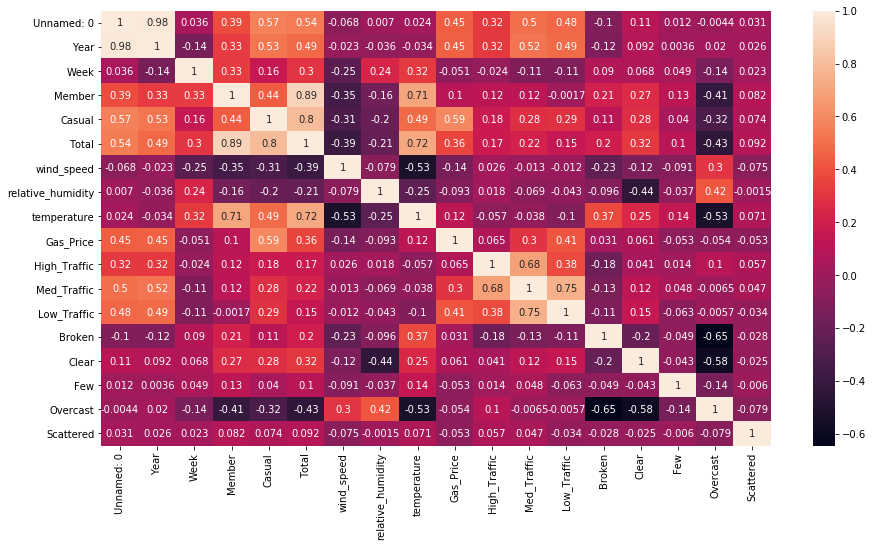

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(low_t_high_m_low_c_traffic.corr(),annot=True)

In [22]:
high_t_high_m_high_c_traffic = pd.read_csv('high_t_high_m_high_c_traffic.csv')

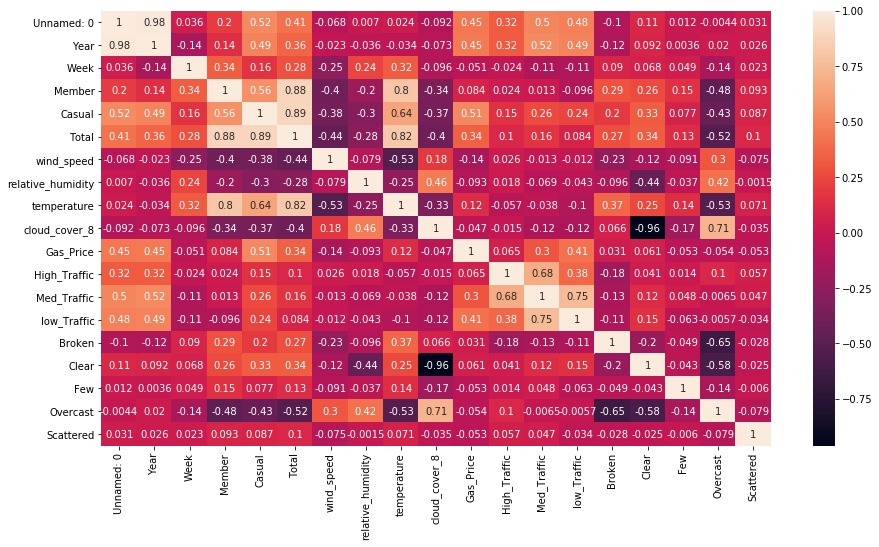

In [23]:
plt.figure(figsize = (15,8))
sns.heatmap(high_t_high_m_high_c_traffic.corr(),annot=True)

In [24]:
high_t_high_m_low_c_traffic = pd.read_csv('high_t_high_m_low_c_traffic.csv')

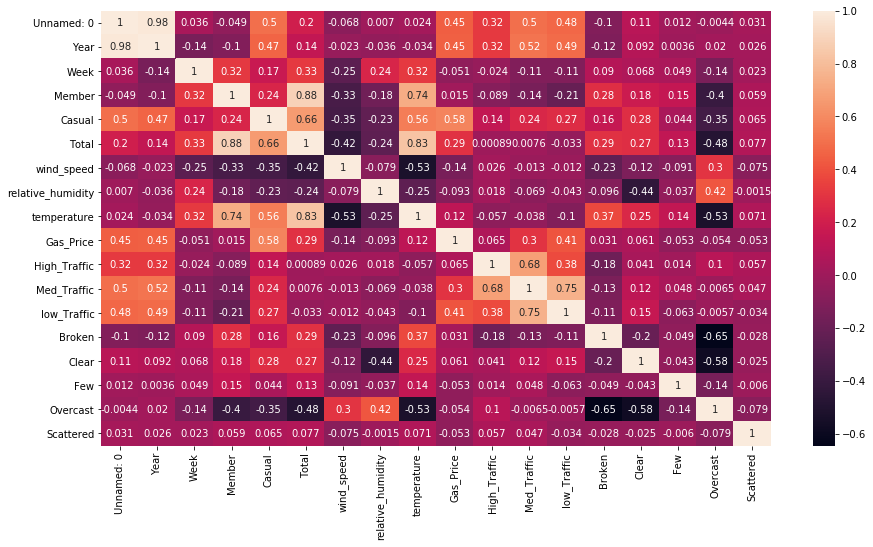

In [25]:
plt.figure(figsize = (15,8))
sns.heatmap(high_t_high_m_low_c_traffic.corr(),annot=True)

# ANOVA tables before and after variable selction - for each segment
Variable selection is done to remove the varibles with p-value greater than 0.05

In [26]:
#high high high before variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + low_Traffic + temperature + Clear + Scattered + Overcast + Few + Broken',data=high_t_high_m_high_c_traffic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.05e-83
Time:                        20:27:34   Log-Likelihood:                -3151.1
No. Observations:                 290   AIC:                             6322.
Df Residuals:                     280   BIC:                             6359.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7618.0652   4451.742     -1.711   

#
Interpretation: Though our R squared value is good (74%) with all the p-values below 0.05, we see that the temperature coefficient is too high - 1876. Hence to reduce the temperature coefficient, we need to normalize the data

In [27]:
#high high high after variable selection
model = ols('Total ~ Gas_Price + High_Traffic + temperature + Overcast + Broken',data=high_t_high_m_high_c_traffic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.41e-87
Time:                        20:27:34   Log-Likelihood:                -3162.7
No. Observations:                 291   AIC:                             6337.
Df Residuals:                     285   BIC:                             6359.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8283.7796   4717.826     -1.756   

In [28]:
#high high low before variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + low_Traffic + temperature + Clear + Scattered + Overcast + Few + Broken',data=high_t_high_m_low_c_traffic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     89.06
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           7.16e-77
Time:                        20:27:34   Log-Likelihood:                -2152.3
No. Observations:                 290   AIC:                             4325.
Df Residuals:                     280   BIC:                             4361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      111.4696    142.198      0.784   

In [29]:
#high high low after variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + temperature + Overcast + Broken',data=high_t_high_m_low_c_traffic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           9.50e-80
Time:                        20:27:34   Log-Likelihood:                -2153.0
No. Observations:                 290   AIC:                             4320.
Df Residuals:                     283   BIC:                             4346.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      149.2730    153.296      0.974   

In [30]:
#low high low before variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + Low_Traffic + temperature + Clear + Scattered + Overcast + Few + Broken',
            data=low_t_high_m_low_c_traffic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     58.59
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           2.79e-59
Time:                        20:27:34   Log-Likelihood:                -1931.0
No. Observations:                 290   AIC:                             3882.
Df Residuals:                     280   BIC:                             3919.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -144.8493     66.284     -2.185   

In [31]:
#low high low after variable selection
model = ols('Total ~ Gas_Price + High_Traffic + temperature + Overcast + Broken',
            data=low_t_high_m_low_c_traffic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           2.97e-63
Time:                        20:27:34   Log-Likelihood:                -1937.8
No. Observations:                 291   AIC:                             3888.
Df Residuals:                     285   BIC:                             3910.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -163.8245     70.099     -2.337   

# Normalization of the dataset
Need for Normalization: Since the coefficient for temperature is very high, we tried only normalizing the temperature column, however we didn't see any drop in the coefficient value. On a deeper analysis, we identified that great variability in the numbers in our features. For example: the temperature range was from -25 to 35, street traffic volume may reach thousands of hundreds, the gas price varied from 70 to 210. Hence it was necessary to normalize all the variables before modeling to know which variable drove the number of total riders. In this project, Z-score was used to normalize the dataset.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
preproces = StandardScaler()

In [34]:
high_t_high_m_high_c_traffic.columns

Index(['Unnamed: 0', 'Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'cloud_cover_8', 'Gas_Price',
       'High_Traffic', 'Med_Traffic', 'low_Traffic', 'cloud', 'Broken',
       'Clear', 'Few', 'Overcast', 'Scattered'],
      dtype='object')

In [35]:
high_t_high_m_high_c_traffic_n = preproces.fit_transform(high_t_high_m_high_c_traffic[['Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'Gas_Price', 'High_Traffic',
       'Med_Traffic', 'low_Traffic']])

In [36]:
high_t_high_m_high_c_traffic_n = pd.DataFrame(high_t_high_m_high_c_traffic_n)

In [37]:
high_t_high_m_high_c_traffic_n.columns=['Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'Gas_Price', 'High_Traffic',
       'Med_Traffic', 'low_Traffic']

In [38]:
high_t_high_m_high_c_traffic_n = pd.concat([high_t_high_m_high_c_traffic_n,high_t_high_m_high_c_traffic[['Broken', 'Clear', 'Few', 'Overcast',
       'Scattered']]],axis = 1)

In [39]:
high_t_high_m_high_c_traffic_n.dropna(inplace = True)

In [40]:
#high high high before variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + low_Traffic + temperature + Clear + Scattered + Overcast + Few + Broken',data=high_t_high_m_high_c_traffic_n).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     102.4
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           3.05e-83
Time:                        20:27:36   Log-Likelihood:                -199.85
No. Observations:                 290   AIC:                             419.7
Df Residuals:                     280   BIC:                             456.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2543      0.100      2.549   

In [41]:
#high high high after variable selection
model = ols('Total ~ Gas_Price + High_Traffic + temperature + Overcast + Broken',data=high_t_high_m_high_c_traffic_n).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           4.14e-87
Time:                        20:27:36   Log-Likelihood:                -201.10
No. Observations:                 290   AIC:                             414.2
Df Residuals:                     284   BIC:                             436.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3319      0.073      4.525   

In [42]:
high_t_high_m_low_c_traffic_n = preproces.fit_transform(high_t_high_m_low_c_traffic[['Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'Gas_Price', 'High_Traffic',
       'Med_Traffic', 'low_Traffic']])

In [43]:
high_t_high_m_low_c_traffic_n = pd.DataFrame(high_t_high_m_low_c_traffic_n)

In [44]:
high_t_high_m_low_c_traffic_n.columns=['Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'Gas_Price', 'High_Traffic',
       'Med_Traffic', 'low_Traffic']

In [45]:
high_t_high_m_low_c_traffic_n = pd.concat([high_t_high_m_low_c_traffic_n,high_t_high_m_low_c_traffic[['Broken', 'Clear', 'Few', 'Overcast',
       'Scattered']]],axis = 1)

In [47]:
high_t_high_m_low_c_traffic_n.dropna(inplace = True)

In [48]:
#before variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + low_Traffic + temperature + Clear + Scattered + Overcast + Few + Broken',data=high_t_high_m_low_c_traffic_n).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     89.06
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           7.16e-77
Time:                        20:27:38   Log-Likelihood:                -214.33
No. Observations:                 290   AIC:                             448.7
Df Residuals:                     280   BIC:                             485.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1806      0.105      1.722   

In [49]:
#after variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + temperature + Overcast + Broken',data=high_t_high_m_low_c_traffic_n).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     134.2
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           9.50e-80
Time:                        20:27:38   Log-Likelihood:                -214.97
No. Observations:                 290   AIC:                             443.9
Df Residuals:                     283   BIC:                             469.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2045      0.078      2.622   

In [50]:
low_t_high_m_low_c_traffic_n = preproces.fit_transform(low_t_high_m_low_c_traffic[['Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'Gas_Price', 'High_Traffic',
       'Med_Traffic', 'Low_Traffic']])

In [51]:
low_t_high_m_low_c_traffic_n = pd.DataFrame(low_t_high_m_low_c_traffic_n)

In [52]:
low_t_high_m_low_c_traffic_n.columns=['Year', 'Week', 'Member', 'Casual', 'Total', 'wind_speed',
       'relative_humidity', 'temperature', 'Gas_Price', 'High_Traffic',
       'Med_Traffic', 'low_Traffic']

In [54]:
low_t_high_m_low_c_traffic_n = pd.concat([low_t_high_m_low_c_traffic_n,low_t_high_m_low_c_traffic[['Broken', 'Clear', 'Few', 'Overcast',
       'Scattered']]],axis = 1)

In [55]:
low_t_high_m_low_c_traffic_n.dropna(inplace = True)

In [56]:
#low high low before variable selection
model = ols('Total ~ Gas_Price + High_Traffic + Med_Traffic + low_Traffic + temperature + Clear + Scattered + Overcast + Few + Broken',data=low_t_high_m_low_c_traffic_n).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     58.59
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           2.79e-59
Time:                        20:27:47   Log-Likelihood:                -257.73
No. Observations:                 290   AIC:                             535.5
Df Residuals:                     280   BIC:                             572.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1765      0.104      1.690   

In [57]:
#low high low after variable selection
model = ols('Total ~ Gas_Price + High_Traffic + temperature + Overcast + Broken',
            data=low_t_high_m_low_c_traffic_n).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     106.2
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           6.53e-63
Time:                        20:27:48   Log-Likelihood:                -258.39
No. Observations:                 290   AIC:                             528.8
Df Residuals:                     284   BIC:                             550.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3126      0.089      3.497   

# Regularization - After and before for each segment
To further increase the R squared value and decrease the RMSE, we decided to implement regularization.

In [58]:
from sklearn.metrics import r2_score

# 1. Performance Improvement for High_Total High_Members High_Casual

# - Before regularization

In [59]:
# high high high
x = high_t_high_m_high_c_traffic_n[['Gas_Price', 'High_Traffic', 'temperature' , 'Overcast' , 'Broken']]
y = high_t_high_m_high_c_traffic_n['Total']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [61]:
# build baseline model

model = LinearRegression().fit(x_train,y_train)

In [62]:
#predict results

pred1 = model.predict(x_test)

In [63]:
# print RMSE and r^2

print(np.sqrt(mean_squared_error(y_test, pred1)))
print(r2_score(y_test,pred1))

0.5211834691915088
0.6896358508945145


# - After Regularization

#  - Regularization Technique 1 - Gradient Descent

In [64]:
model.coef_

array([ 0.25470805,  0.12481096,  0.70836208, -0.41983622, -0.16029526])

In [65]:
model.intercept_

0.28863939018988555

In [66]:
model_sgd = SGDRegressor().fit(x_train, y_train)

In [67]:
model_sgd.coef_

array([ 0.25900559,  0.12995573,  0.72186444, -0.21226487,  0.06357716])

In [68]:
model_sgd.intercept_

array([0.10381342])

In [69]:
pred2 = model_sgd.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

0.5377286459024169
0.6696178081861628


# - Regularization Technique 2 - Lasso

In [70]:
model_lasso = Lasso().fit(x, y)
predicted_lasso = model_lasso.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_lasso)))
print(r2_score(y,predicted_lasso))

0.9986916741402747
0.0


In [71]:
polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
model_lasso = Lasso().fit(x_new, y)
predicted_lasso = model_lasso.predict(x_new)

In [72]:
model_lasso.coef_

array([ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.])

In [73]:
model_lasso.intercept_

0.00786561376568588

In [74]:
print(np.sqrt(mean_squared_error(y,predicted_lasso)))
print(r2_score(y,predicted_lasso))

0.9986916741402747
0.0


In [75]:
#maybe not suitable

# # - Regularization Technique 3 - Elastic Regression

In [76]:
new_model = ElasticNet().fit(x, y)
predicted_elastic = new_model.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_elastic)))
print(r2_score(y,predicted_elastic))

0.8347892023234326
0.3012999289183099


In [77]:
new_model.coef_

array([ 0.        ,  0.        ,  0.21120456, -0.        ,  0.        ])

In [78]:
new_model.intercept_

0.00665539233609827

In [79]:
polynomial_features = PolynomialFeatures(degree = 8,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
new_model = ElasticNet().fit(x_new, y)
predicted_elastic = new_model.predict(x_new)
print(np.sqrt(mean_squared_error(y,predicted_elastic)))
print(r2_score(y,predicted_elastic))

0.7144286927846435
0.4882534564178692


C:\Users\murphy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.50046687600782, tolerance: 0.028924166739916036
  positive)


In [80]:
new_model.coef_

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
new_model.intercept_

-0.11267935353308993

In [82]:
#not ideal

# - Regularization Technique 4 - Ridge

In [88]:
model_ridge = Ridge(solver='sag').fit(x, y)
predicted_ridge = model_ridge.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_ridge)))
print(r2_score(y,predicted_ridge))

0.48413156447645483
0.7650021229282298


In [84]:
#decline in rmse
#increae r^2

In [91]:
polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
model_ridge = Ridge(solver='sag').fit(x_new, y)
predicted_ridge = model_ridge.predict(x_new)
print(np.sqrt(mean_squared_error(y,predicted_ridge)))
print(r2_score(y,predicted_ridge))

0.4394975847098767
0.8063354518601111


In [92]:
#further decline in rmse
#further increae r^2

In [93]:
model_ridge.intercept_

0.25237493885230755

In [94]:
model_ridge.coef_

array([ 0.15837139,  0.21080191,  0.69979616, -0.18160544, -0.10272052,
       -0.00180775, -0.03487486,  0.10422733,  0.07306383,  0.17952111,
       -0.02851623,  0.12747375, -0.05439139,  0.07475118,  0.04936789,
        0.02242867,  0.09611816, -0.18160544,  0.        , -0.10272052])

# 2. Performance Improvement for High_Total High_Members Low_Casual

# - Before regularization

In [480]:
# high high high
x = high_t_high_m_low_c_traffic_n[['Gas_Price', 'High_Traffic', 'temperature' , 'Overcast' , 'Broken']]
y = high_t_high_m_low_c_traffic_n['Total']

In [481]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [482]:
# build baseline model

model = LinearRegression().fit(x_train,y_train)

In [483]:
#predict results

pred1 = model.predict(x_test)

In [484]:
# print RMSE and r^2

print(np.sqrt(mean_squared_error(y_test, pred1)))
print(r2_score(y_test,pred1))

0.4958980679379413
0.7413380837067703


# - After Regularization

# - Regularization Technique 2 - Gradient Descent

In [485]:
model.coef_

array([ 0.18723061,  0.04804556,  0.78515362, -0.20067934, -0.17593952])

In [486]:
model.intercept_

0.17796536981897423

In [487]:
model_sgd = SGDRegressor().fit(x_train, y_train)

In [488]:
model_sgd.coef_

array([ 0.19188486,  0.0550379 ,  0.76786997, -0.11882034,  0.01337151])

In [489]:
model_sgd.intercept_

array([0.08414942])

In [490]:
pred2 = model_sgd.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

0.49603379483132237
0.7411964732225401


# - Regularization Technique 2 - Lasso

In [491]:
model_lasso = Lasso().fit(x, y)
predicted_lasso = model_lasso.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_lasso)))
print(r2_score(y,predicted_lasso))

0.9958015719376909
0.0


In [492]:
polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
model_lasso = Lasso().fit(x_new, y)
predicted_lasso = model_lasso.predict(x_new)

In [493]:
model_lasso.coef_

array([ 0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0., -0.,  0.,  0.])

In [494]:
model_lasso.intercept_

0.009936716234637636

In [495]:
print(np.sqrt(mean_squared_error(y,predicted_lasso)))
print(r2_score(y,predicted_lasso))

0.9958015719376909
0.0


In [496]:
#maybe not suitable

#  - Regularization Technique 3 - Elastic

In [497]:
new_model = ElasticNet().fit(x, y)
predicted_elastic = new_model.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_elastic)))
print(r2_score(y,predicted_elastic))

0.821914756322486
0.3187477646300447


In [498]:
new_model.coef_

array([ 0.        ,  0.        ,  0.21956185, -0.        ,  0.        ])

In [499]:
new_model.intercept_

0.008678606766792721

In [500]:
polynomial_features = PolynomialFeatures(degree = 8,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
new_model = ElasticNet().fit(x_new, y)
predicted_elastic = new_model.predict(x_new)
print(np.sqrt(mean_squared_error(y,predicted_elastic)))
print(r2_score(y,predicted_elastic))

0.7279735040173666
0.46557652055699894


/Users/murphyzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.247e+01, tolerance: 2.876e-02
  model = cd_fast.enet_coordinate_descent(


In [501]:
new_model.coef_

array([ 0., -0.,  0., ...,  0.,  0.,  0.])

In [502]:
new_model.intercept_

-0.05031410073356669

In [503]:
#not ideal

# - Regularization Technique 4 - Ridge

In [504]:
model_ridge = Ridge(solver='sag').fit(x, y)
predicted_ridge = model_ridge.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_ridge)))
print(r2_score(y,predicted_ridge))

0.5129753036031994
0.7346327649752137


In [505]:
#Interpreation:
#decline in rmse
#increae r^2

In [506]:
polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
model_ridge = Ridge(solver='sag').fit(x_new, y)
predicted_ridge = model_ridge.predict(x_new)
print(np.sqrt(mean_squared_error(y,predicted_ridge)))
print(r2_score(y,predicted_ridge))

0.4708428147358457
0.7764337307721125


In [507]:
#further decline in rmse
#further increae r^2

# Performance Improvement for Low _Total High_Members Low_casual

#  - Before regularization

In [510]:
# high high high
x = low_t_high_m_low_c_traffic_n[['Gas_Price', 'High_Traffic', 'temperature' , 'Overcast' , 'Broken']]
y = low_t_high_m_low_c_traffic_n['Total']

In [511]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [512]:
# build baseline model

model = LinearRegression().fit(x_train,y_train)

In [513]:
#predict results

pred1 = model.predict(x_test)

In [514]:
# print RMSE and r^2

print(np.sqrt(mean_squared_error(y_test, pred1)))
print(r2_score(y_test,pred1))

0.5906033720312646
0.6408335865499828


# After Regularization

# - Regularization Technique 1 - Gradient Descent

In [515]:
model.coef_

array([ 0.26977647,  0.1869356 ,  0.6003528 , -0.55379088, -0.48464408])

In [516]:
model.intercept_

0.43794205855961893

In [517]:
model_sgd = SGDRegressor().fit(x_train, y_train)

In [518]:
model_sgd.coef_

array([ 0.28094097,  0.19797688,  0.61666273, -0.20513034, -0.0428382 ])

In [519]:
model_sgd.intercept_

array([0.11845204])

In [520]:
pred2 = model_sgd.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

0.5648133228751663
0.6715163648362398


In [521]:
#decline in rmse
#increae r^2

# - Regularization Technique 2 - Lasso

In [522]:
model_lasso = Lasso().fit(x, y)
predicted_lasso = model_lasso.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_lasso)))
print(r2_score(y,predicted_lasso))

0.9992247103227413
0.0


In [523]:
polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
model_lasso = Lasso().fit(x_new, y)
predicted_lasso = model_lasso.predict(x_new)

In [524]:
model_lasso.coef_

array([ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.])

In [525]:
model_lasso.intercept_

0.007278364956867341

In [526]:
print(np.sqrt(mean_squared_error(y,predicted_lasso)))
print(r2_score(y,predicted_lasso))

0.9992247103227413
0.0


In [527]:
#maybe not suitable

#  - Regularization Technique 3 - Elastic

In [528]:
new_model = ElasticNet().fit(x, y)
predicted_elastic = new_model.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_elastic)))
print(r2_score(y,predicted_elastic))

0.8984904756470343
0.191461648287514


In [529]:
new_model.coef_

array([ 0.        ,  0.        ,  0.14756736, -0.        ,  0.        ])

In [530]:
new_model.intercept_

0.006432790518516475

In [531]:
polynomial_features = PolynomialFeatures(degree = 8,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
new_model = ElasticNet().fit(x_new, y)
predicted_elastic = new_model.predict(x_new)
print(np.sqrt(mean_squared_error(y,predicted_elastic)))
print(r2_score(y,predicted_elastic))

0.770373041569429
0.4056040760509676


/Users/murphyzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.650e+01, tolerance: 2.896e-02
  model = cd_fast.enet_coordinate_descent(


In [532]:
new_model.coef_

array([0., 0., 0., ..., 0., 0., 0.])

In [533]:
new_model.intercept_

-0.10570848799219315

In [534]:
#not ideal

# - Regularization Technique 4 - Ridge

In [535]:
model_ridge = Ridge(solver='sag').fit(x, y)
predicted_ridge = model_ridge.predict(x)
print(np.sqrt(mean_squared_error(y,predicted_ridge)))
print(r2_score(y,predicted_ridge))

0.589861564341738
0.6515232034464247


In [536]:
#decline in rmse
#increae r^2

In [537]:
polynomial_features = PolynomialFeatures(degree = 2,  include_bias=False)
x_new = polynomial_features.fit_transform(x)
model_ridge = Ridge(solver='sag').fit(x_new, y)
predicted_ridge = model_ridge.predict(x_new)
print(np.sqrt(mean_squared_error(y,predicted_ridge)))
print(r2_score(y,predicted_ridge))

0.5422304208241094
0.7055297482384448


In [645]:
#further decline in rmse
#further increae r^2

# Conclusion:
1. As per our analysis, we can establish a clear picture that the bike demand is dependent on the temperature, cloud cover, gas price and traffic volume of which temperature is of the major driving factors followed by gas price. 
2. We segmented the stations into 8 categories based on total riders, annual riders, and casual riders and chose to work with the categories which includes high member segments as the chosen variables have a higher impact on their decision as compared to the low member segments. 
3. Created a polynomial model and normalized the data using Z-Score to lower the coefficient value and improve our model performance
4. We achieve R square values ranging between 65% - 75% and RMSE score of 0.5
5. To further improvise the model, we performed various regularization techniques of which we could see a significant improvement through ridge regression
6. After regularization, our R square values increased in the range of 71% - 80% while the RMSE score dropped to 0.4